# BANK LOAN DEFAULTER EDA

In this EDA project we will look for those features/columns/factors that are necessary in determining that whether a person is defaulter or not.

So we will consider those factors/features that are associated with the behaviour of the applicant before giving them a loan.

I have divided the project in 3 parts:

1. Data Understanding
2. Data cleaning
3. Data visualization and analysis

In [7]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import re

In [8]:
# Reading the dataset into this file

loan = pd.read_csv('loan_csv.csv')

C:\Users\fv2\AppData\Local\Temp\ipykernel_26280\2682786644.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan_csv.csv')


Reading the 'loan' csv file into jupyter notebook to clean the data, fill the missing data and analise the correlation between different valid columns.

## Data Understanding

In [9]:
# Making an independent copy of the original data safe side

loan1=loan.copy()

Making an independent copy of the original file where all the cleaning will be performed.

In [10]:
# Viewing the first five records of the dataset to get a basic idea of of the data

loan1.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


By looking at the first 5 rows of the dataset we get a basic overview of the data we are dealing with, using 'head()' function.

In [11]:
loan1.shape

(39717, 111)

Now we know the overall size of the dataset.

In [12]:
# Using the 'verbose' attribute of info function because the dataset is big. 'verbose' attribute allows to print the full summary (generally used for large datasets)
# Using the 'show_counts' attribute gives us the count for non-null values in each column

loan1.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

Using 'info()' function we get the basic information about each column of the dataset.

We get an insight on the number count of non-null values and the data type of each column. 

In [13]:
# Using describe() function to get a base idea of non-numeric data.

pd.set_option('display.max_columns', None)
loan1.describe(include=['O'])

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,26567,39717,39706,39717,39717,39717,39667,39717,39646,1140,39715,39717
unique,2,371,7,35,28617,11,5,3,55,3,1,39717,26519,14,19339,823,50,526,1089,1,101,2,106,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Debt Consolidation,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,Jun-16,May-16,INDIVIDUAL
freq,29096,956,12020,2917,136,8879,18899,16921,2260,32950,39717,1,8,18641,2255,597,7099,370,977,39717,1256,1125,10308,39717


Using describe for non-numeric data, we get an idea about which value has the most frequency (and how much) for each column.

In [14]:
# Using describe() function to get a base idea of how numeric data is normally distributed.

pd.set_option('display.max_columns', None)
loan1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Using describe function for numeric data we get a basic idea about how the data is distributed in each column.

Few columns have '0' data filled in them, which is of no use to us in further stages of analysis.

In [15]:
# Checking the percentage of null values in each column

'''
    pd.set_option('display.max_rows', None)
    (loan1.isna().sum()*100)/len(loan1.index)

You write the above code or this too.
'''

for column in loan1.columns:
    print(column,': {0:.3f}%'.format((loan1[column].isna().sum()*100)/len(loan1.index)))

id : 0.000%
member_id : 0.000%
loan_amnt : 0.000%
funded_amnt : 0.000%
funded_amnt_inv : 0.000%
term : 0.000%
int_rate : 0.000%
installment : 0.000%
grade : 0.000%
sub_grade : 0.000%
emp_title : 6.191%
emp_length : 2.707%
home_ownership : 0.000%
annual_inc : 0.000%
verification_status : 0.000%
issue_d : 0.000%
loan_status : 0.000%
pymnt_plan : 0.000%
url : 0.000%
desc : 33.109%
purpose : 0.000%
title : 0.028%
zip_code : 0.000%
addr_state : 0.000%
dti : 0.000%
delinq_2yrs : 0.000%
earliest_cr_line : 0.000%
inq_last_6mths : 0.000%
mths_since_last_delinq : 64.662%
mths_since_last_record : 92.985%
open_acc : 0.000%
pub_rec : 0.000%
revol_bal : 0.000%
revol_util : 0.126%
total_acc : 0.000%
initial_list_status : 0.000%
out_prncp : 0.000%
out_prncp_inv : 0.000%
total_pymnt : 0.000%
total_pymnt_inv : 0.000%
total_rec_prncp : 0.000%
total_rec_int : 0.000%
total_rec_late_fee : 0.000%
recoveries : 0.000%
collection_recovery_fee : 0.000%
last_pymnt_d : 0.179%
last_pymnt_amnt : 0.000%
next_pymnt_d 

We can see that few columns have some missing values and few columns have a lot of missing values in them.

In [16]:
# Viewing the unique data of each column in the dataset

for i in loan1.columns:
    print(loan1.groupby(i)['id'].nunique(),'\n',sep='-------------------------------------------------------------------------')

id
54734      1
55742      1
57245      1
57416      1
58915      1
          ..
1075358    1
1076863    1
1077175    1
1077430    1
1077501    1
Name: id, Length: 39717, dtype: int64-------------------------------------------------------------------------

member_id
70699      1
73673      1
74724      1
76583      1
80353      1
          ..
1306957    1
1311441    1
1311748    1
1313524    1
1314167    1
Name: id, Length: 39717, dtype: int64-------------------------------------------------------------------------

loan_amnt
500        5
700        1
725        1
750        1
800        1
        ... 
34475      5
34525      1
34675      1
34800      2
35000    679
Name: id, Length: 885, dtype: int64-------------------------------------------------------------------------

funded_amnt
500        5
700        1
725        1
750        1
800        1
        ... 
34475      4
34525      1
34675      2
34800      1
35000    554
Name: id, Length: 1041, dtype: int64-----------------------

earliest_cr_line
Apr-00    255
Apr-01    176
Apr-02    129
Apr-03    112
Apr-04    137
         ... 
Sep-95    172
Sep-96    176
Sep-97    183
Sep-98    245
Sep-99    258
Name: id, Length: 526, dtype: int64-------------------------------------------------------------------------

inq_last_6mths
0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: id, dtype: int64-------------------------------------------------------------------------

mths_since_last_delinq
0.0      443
1.0       30
2.0      101
3.0      145
4.0      153
        ... 
103.0      2
106.0      1
107.0      1
115.0      1
120.0      1
Name: id, Length: 95, dtype: int64-------------------------------------------------------------------------

mths_since_last_record
0.0      670
5.0        1
6.0        1
7.0        1
11.0       2
        ... 
117.0     47
118.0     36
119.0     10
120.0      1
129.0      1
Name: id, Length: 111, dtype: int64--------------------------------

Series([], Name: id, dtype: int64)-------------------------------------------------------------------------

Series([], Name: id, dtype: int64)-------------------------------------------------------------------------

Series([], Name: id, dtype: int64)-------------------------------------------------------------------------

Series([], Name: id, dtype: int64)-------------------------------------------------------------------------

Series([], Name: id, dtype: int64)-------------------------------------------------------------------------

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: id, dtype: int64-------------------------------------------------------------------------

tax_liens
0.0    39678
Name: id, dtype: int64-------------------------------------------------------------------------

Series([], Name: id, dtype: int64)-------------------------------------------------------------------------

Series([], Name: id, dtype: int64)-----------------------------------

We can clearly see that which columns have unique data and which columns have repeative data.

By doing this we can remove those columns which do not have null values but have same/repeative values across rows. Since such type of column serve no purpose in data analysis so removing them will not affect our analysis.

## Data Cleaning

In [17]:
# The column int_rate is character type, let's convert it to float

loan1['int_rate'] = loan1['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [18]:
# Using for loop to remove all the columns with complete null values or those columns whose null values exceed 60% of that column's data

for i in loan1.columns:
    if loan1[i].isna().sum()==39717 or loan1[i].isna().sum()>len(loan1.index)*0.6:
        loan1 = loan1.drop(i,axis=1)

Now we have cleaned some of the data from the dataset, reduced the size of the dataset so that we can do a better analysis.

In [19]:
# Cross checking the removed data using info function 

loan1.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

We can clearly see that all the columns with major null values are removed.

The number of columns have dropped from 111 to 54.

In [20]:
loan_columns = list(loan1.columns)
loan_columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [21]:
# Dropping those columns that contain same repeative values across all it's rows

for i in loan_columns[1:]:
    if loan1.groupby(i)['id'].nunique().value_counts().count() == 1:
        loan1 = loan1.drop(i,axis=1)

After dropping all those columns let's take a look at the dataset now.

In [22]:
loan1.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgrade...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use thi...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [23]:
loan1.shape

(39717, 43)

Clearly the size of dataset has decreased from 54 columns to 43 columns.

In [24]:
loan1.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  float64
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_title                37258 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

We can compare these column names to the previous column names to cross-check the columns removed.

Now we will understand the data column-by-column and filter out all those data columns which reflect the behaviour of club, borrower and invester after the loan is issued. Because we want to work with only those factors which will help us determine the defaulters before any loan is issued.

So we want to keep all those columns which provide us with the information about the borrower beofre a loan is given.

In [25]:
not_imp = ['emp_title','desc','title','zip_code','earliest_cr_line','revol_bal','revol_util','total_acc','out_prncp',
           'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
           'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
           'last_pymnt_amnt','last_credit_pull_d']

After proper knowledge of the data and understanding the requirement, these are the columns that are irrelevant.

In [26]:
# Now removing all these columns

for i in not_imp:    loan1 = loan1.drop(i,axis=1)

We have successfully removed all those columns that were irrelevent to us, now let's look at the size of the dataset.

In [27]:
loan1.shape

(39717, 23)

It is clearly visible that the number of columns mentioned are all removed, as it went down from 43 to 23 columns. (we mentioned 20 columns to drop)

In [28]:
loan1['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We can clearly see that majority of the data in 'loan_status' column is filled with 'Fully Paid'.

Since applicants with their 'loan_status' as 'Current' are of no help in anakysis because those loans are already given.

What we can do is compare the relation of 'Fully Paid' and 'Charged off' with every other column to see the differences and the  impact it makes.

In [29]:
# Removing those rows that contains 'current' in their 'loan_status' column.

current = loan1[loan1['loan_status'].isin(['Current'])].index
loan1 = loan1.drop(current)

First we extracted those rows that have 'Current' in their 'loan_status'
Then we took their index value and made a list.
Then we passed that list and dropped it all.

In [30]:
loan1.shape

(38577, 23)

The row count has decreased significantly from 39717 to 38577

In [31]:
# Viewing the data in each column to check the count of each unqiue data

for i in loan1.columns:
    print(loan1.groupby(i)['id'].nunique(),'\n',sep='-------------------------------------------------------------------------')

id
54734      1
55742      1
57245      1
57416      1
58915      1
          ..
1075269    1
1076863    1
1077175    1
1077430    1
1077501    1
Name: id, Length: 38577, dtype: int64-------------------------------------------------------------------------

loan_amnt
500        5
700        1
725        1
750        1
800        1
        ... 
34475      5
34525      1
34675      1
34800      2
35000    601
Name: id, Length: 870, dtype: int64-------------------------------------------------------------------------

funded_amnt
500        5
700        1
725        1
750        1
800        1
        ... 
34475      4
34525      1
34675      2
34800      1
35000    499
Name: id, Length: 1019, dtype: int64-------------------------------------------------------------------------

funded_amnt_inv
0.000000        129
0.000121          1
0.000531          1
0.000655          1
0.001868          1
               ... 
34993.263060      1
34993.325710      1
34993.655390      1
34997.352450     

We can see that in some columns the unique count of a particular data is very high than the rest of the data in that column.

Also 'id' column is not giving any valuable information.

So now we have to drop those columns too.

In [32]:
drop_column = ['delinq_2yrs','pub_rec','pub_rec_bankruptcies','id']
loan1 = loan1.drop(drop_column, axis=1)

These columns have more than 85% of the as zero as we could see from the above table.

In [33]:
loan1.shape

(38577, 19)

In [34]:
# Converting 'loan_status' column in 0 and 1

loan1['loan_status'] = loan1['loan_status'].replace(to_replace=['Fully Paid','Charged Off'], value=[0,1])
loan1['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [35]:
# Looking at the data to fill the missing values in each column

loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt          38577 non-null  int64  
 2   funded_amnt_inv      38577 non-null  float64
 3   term                 38577 non-null  object 
 4   int_rate             38577 non-null  float64
 5   installment          38577 non-null  float64
 6   grade                38577 non-null  object 
 7   sub_grade            38577 non-null  object 
 8   emp_length           37544 non-null  object 
 9   home_ownership       38577 non-null  object 
 10  annual_inc           38577 non-null  float64
 11  verification_status  38577 non-null  object 
 12  issue_d              38577 non-null  object 
 13  loan_status          38577 non-null  int64  
 14  purpose              38577 non-null  object 
 15  addr_state           38577 non-null 

As we can see that only one column has some null values that is 'emp_length'

In [36]:
# 'include=[object]' only includes non-numeric data columns from the dataset

loan1.describe(include=[object])

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state
count,38577,38577,38577,37544,38577,38577,38577,38577,38577
unique,2,7,35,11,5,3,55,14,50
top,36 months,B,A4,10+ years,RENT,Not Verified,Nov-11,debt_consolidation,CA
freq,29096,11675,2873,8488,18480,16694,2062,18055,6949


Now from the above table we can see that the mode of 'emp_length' is '10+ years'.

Now we can consider that value to fill the missing data in that column.

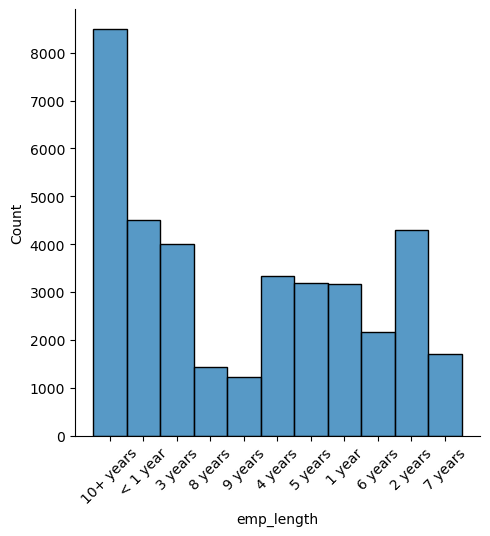

In [37]:
# Plotting a distribution plot for 'emp_length'

sns.displot(x='emp_length',data=loan1)
plt.xticks(rotation=45)
plt.show()

Since this column is not normally distributed, we cannot give a proper decision.

So it's better to drop these rows.

In [38]:
# Dropping rows with null values

loan1 = loan1[~loan1['emp_length'].isnull()] 

In [39]:
# Extracting numeric values from emp_length and converting it's data type from oject to int.

loan1['emp_length'] = loan1['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
loan1['emp_length'] = loan1['emp_length'].apply(lambda x: pd.to_numeric(x))

In [40]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            37544 non-null  int64  
 1   funded_amnt          37544 non-null  int64  
 2   funded_amnt_inv      37544 non-null  float64
 3   term                 37544 non-null  object 
 4   int_rate             37544 non-null  float64
 5   installment          37544 non-null  float64
 6   grade                37544 non-null  object 
 7   sub_grade            37544 non-null  object 
 8   emp_length           37544 non-null  int64  
 9   home_ownership       37544 non-null  object 
 10  annual_inc           37544 non-null  float64
 11  verification_status  37544 non-null  object 
 12  issue_d              37544 non-null  object 
 13  loan_status          37544 non-null  int64  
 14  purpose              37544 non-null  object 
 15  addr_state           37544 non-null 

Now there's no missing values in the dataset and it is ready for the final stage of EDA.

## Data Visualization

C:\Users\fv2\AppData\Local\Temp\ipykernel_26280\2525872041.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan1.corr(), annot=True)


<Axes: >

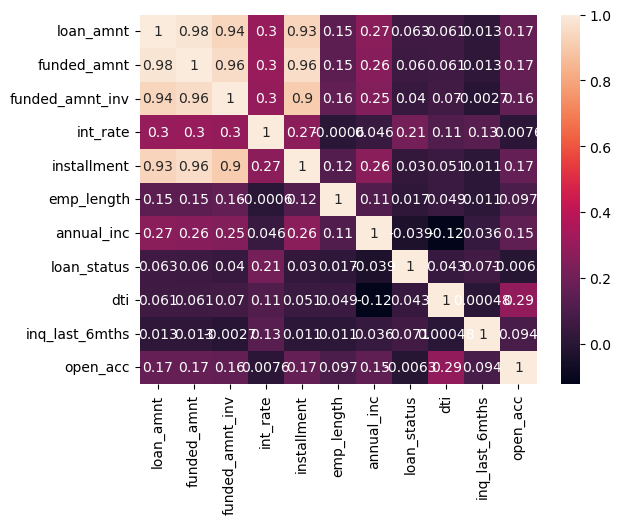

In [41]:
# Plotting a correlation map between all the numeric data columns

sns.heatmap(loan1.corr(), annot=True)

We can see that loan_amt, funded_amnt, funded_amnt_inv and installment are highly correlated to each other.

We will perform data visualization in 3 parts, that is:
1. Univariate analysis
2. Bivariate analysis
3. Multivariate analysis

to read in depth about these analysis you can click on the link,
https://www.geeksforgeeks.org/univariate-bivariate-and-multivariate-data-and-its-analysis/

In [42]:
# Let's look at the default rate from 'loan_status' column

round(np.mean(loan1['loan_status']), 2)

0.14

So the overall default rate is 14%.

### 1. Univariate Analysis

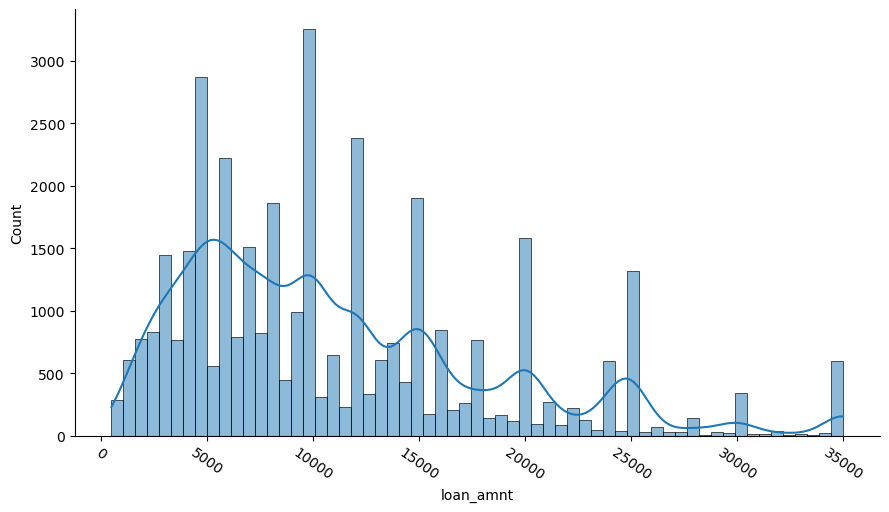

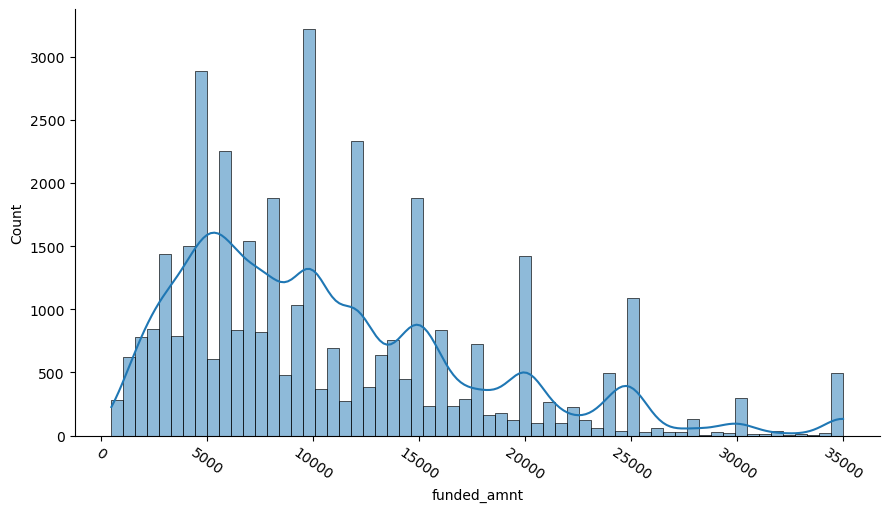

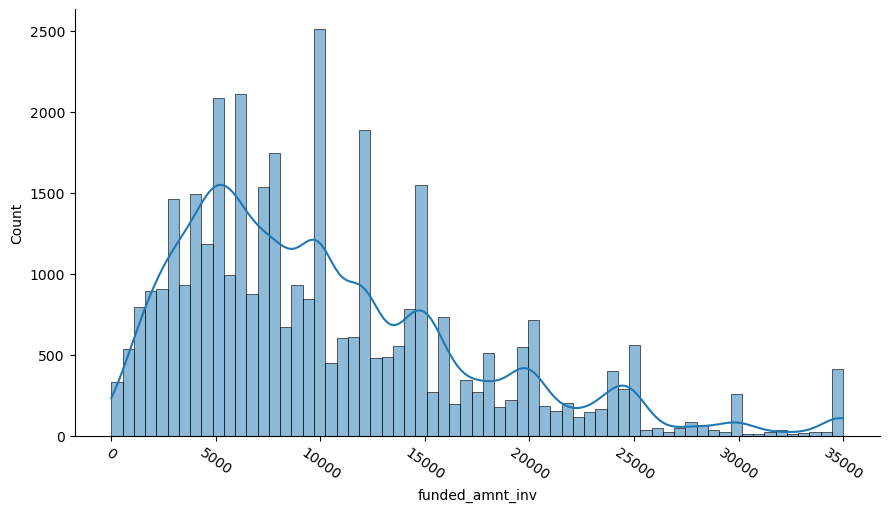

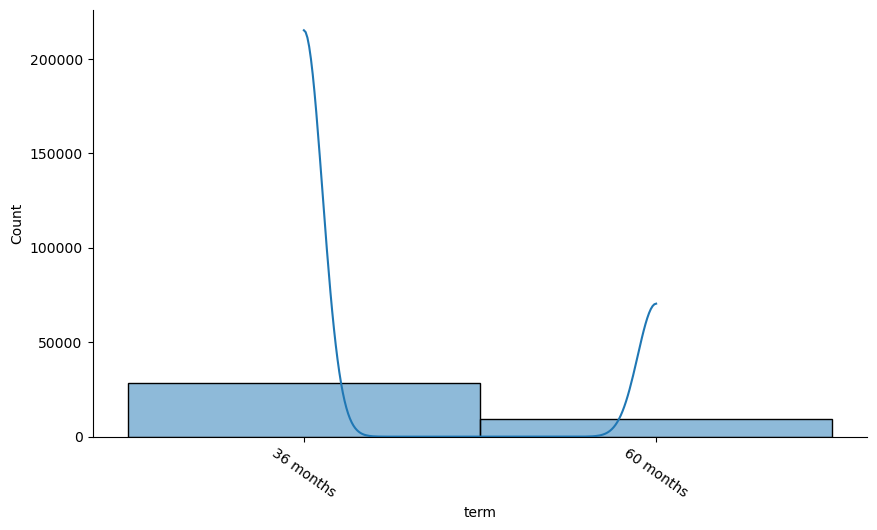

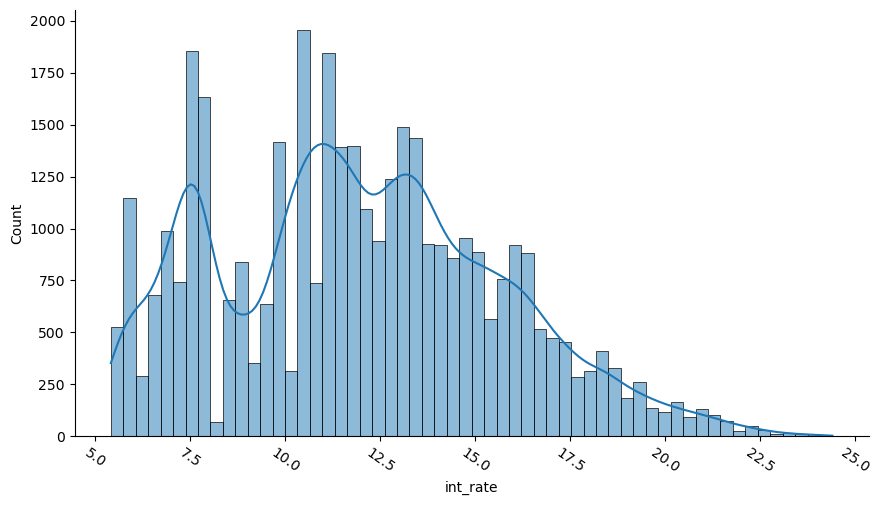

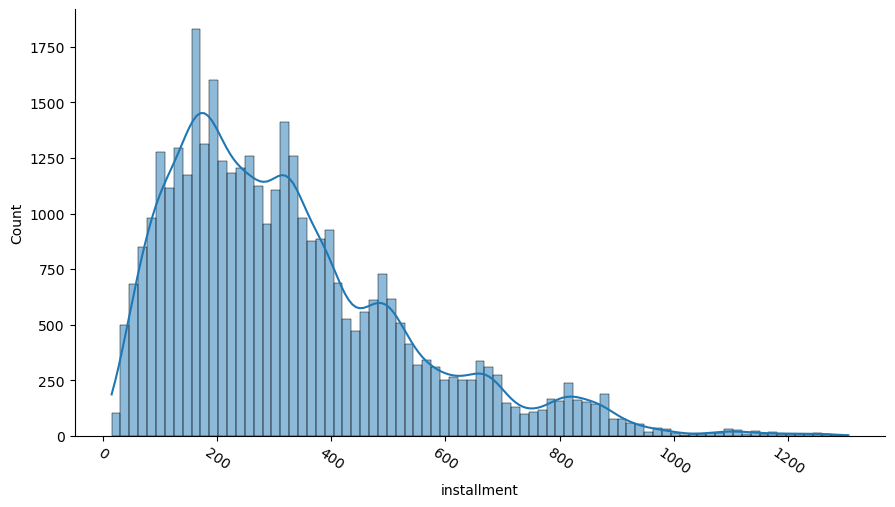

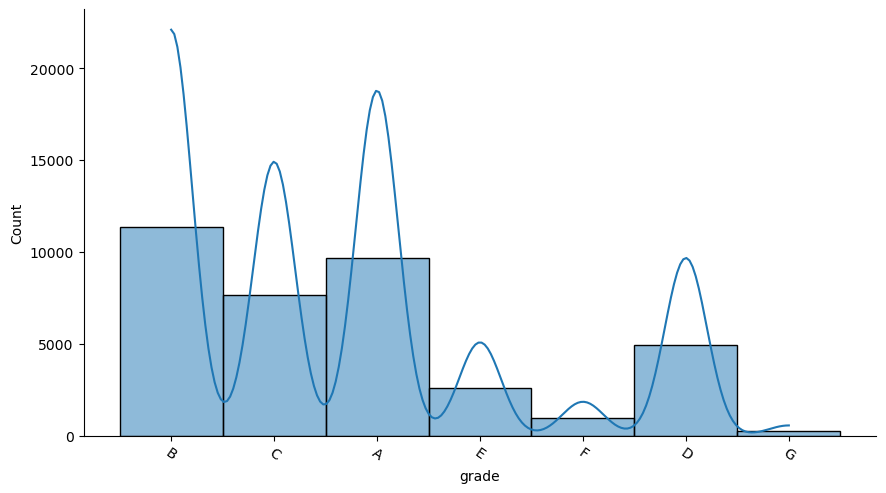

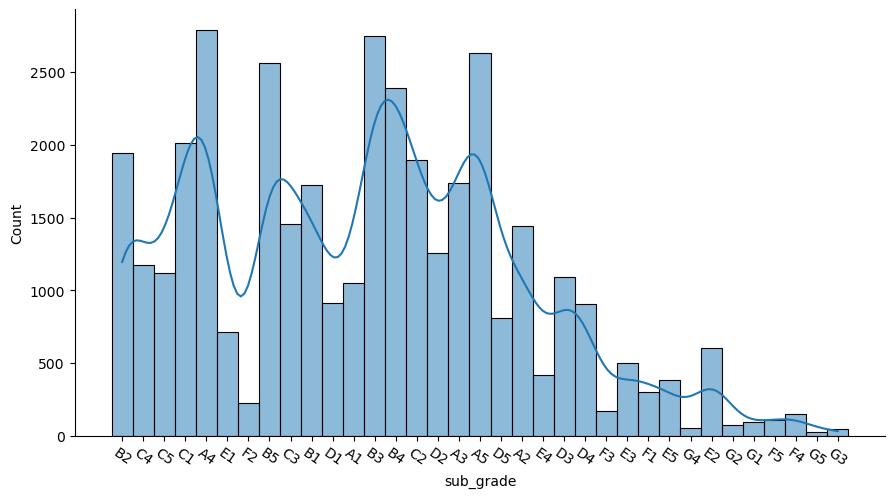

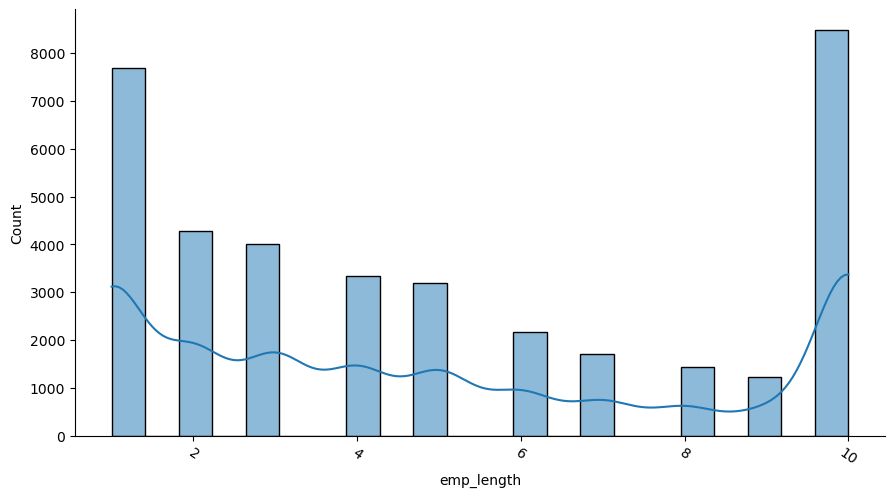

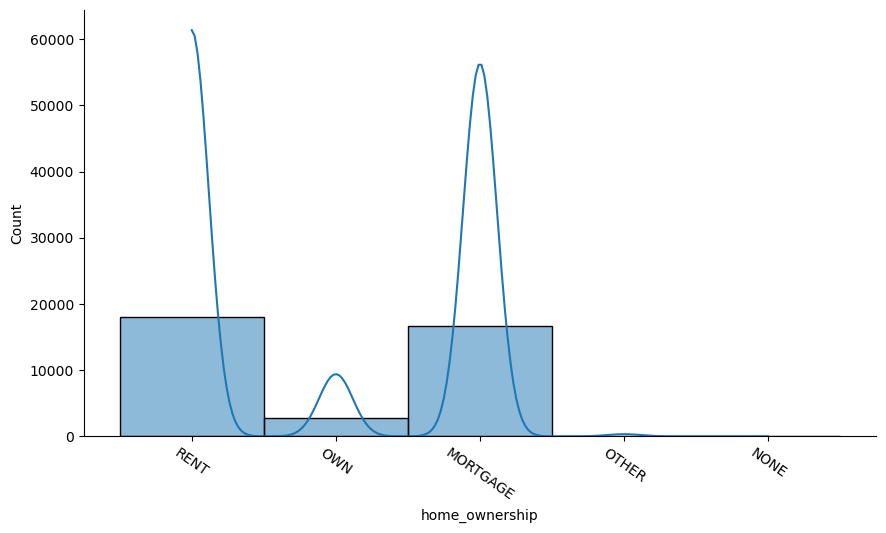

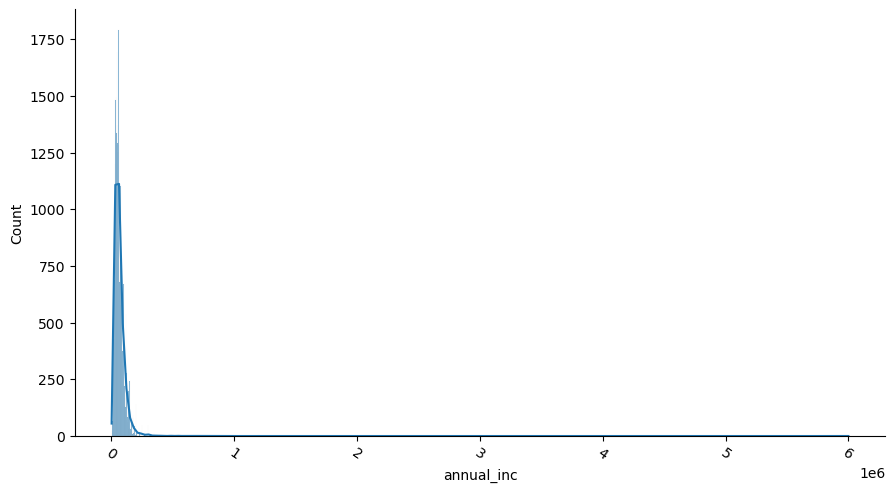

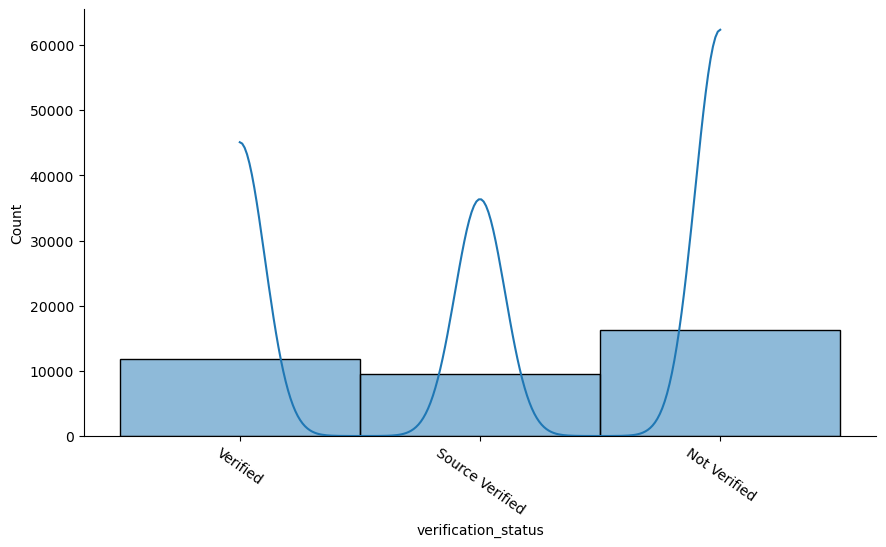

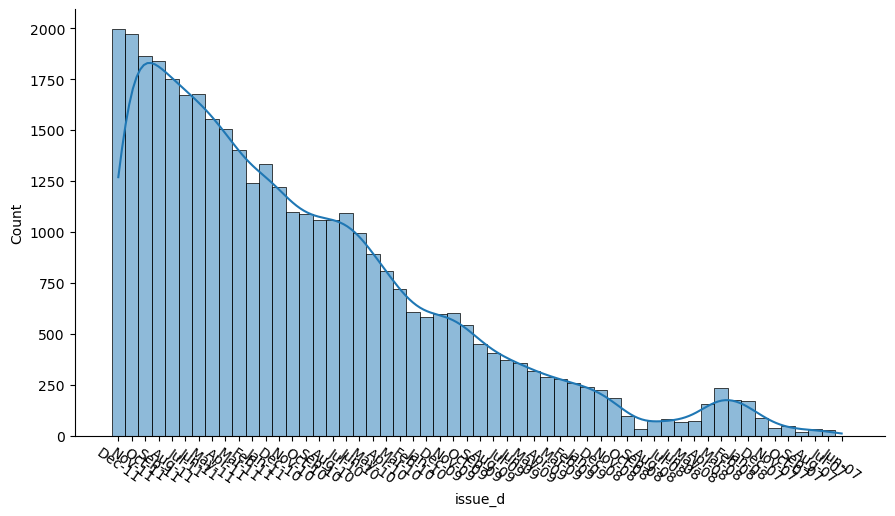

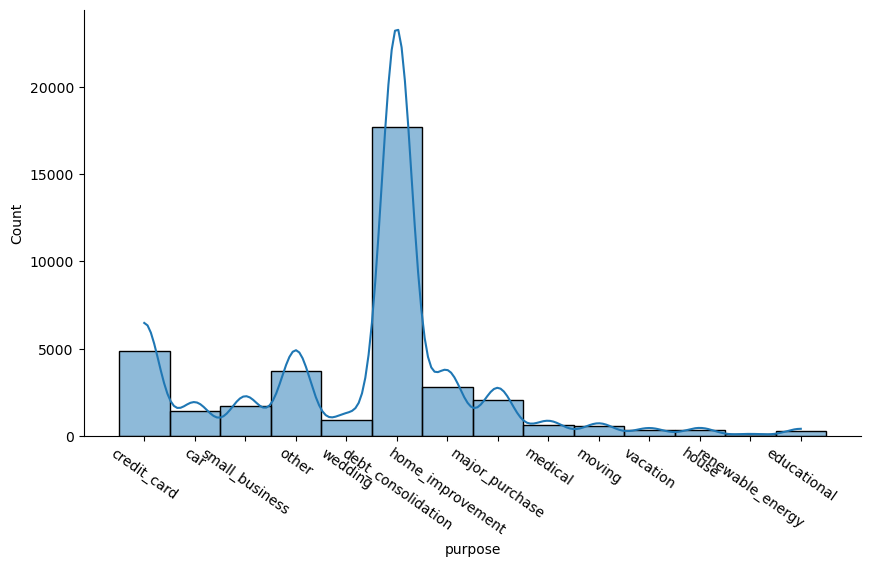

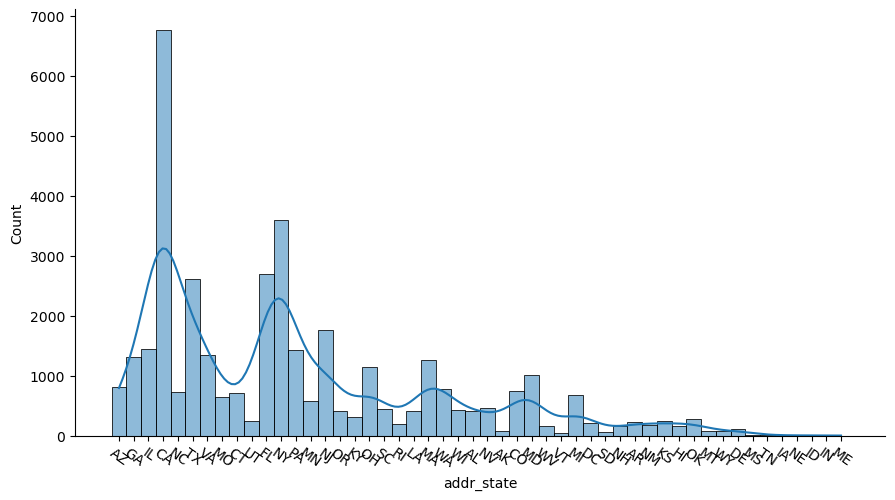

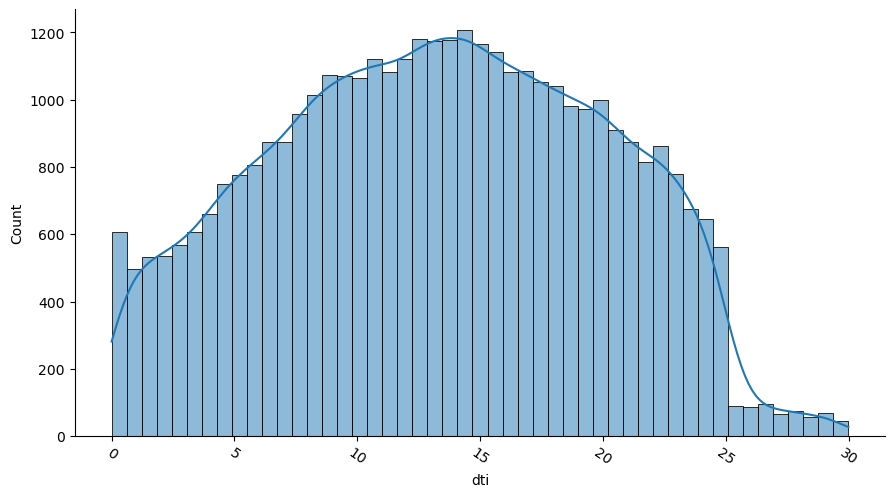

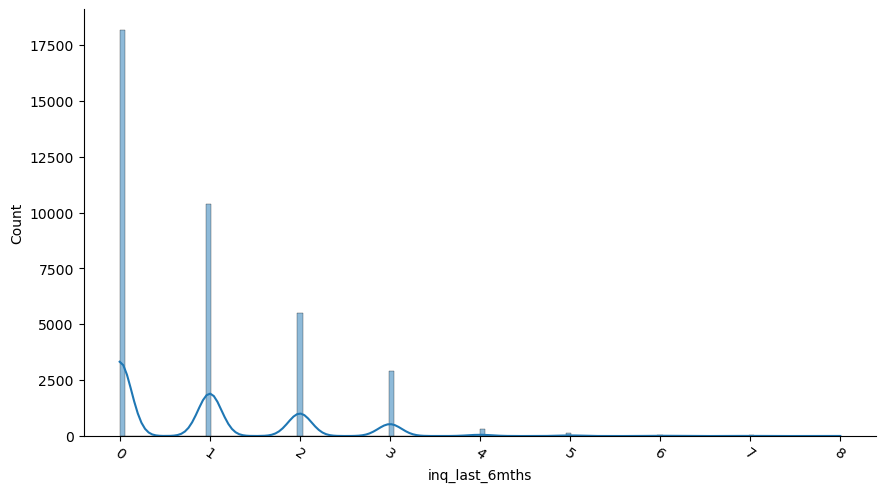

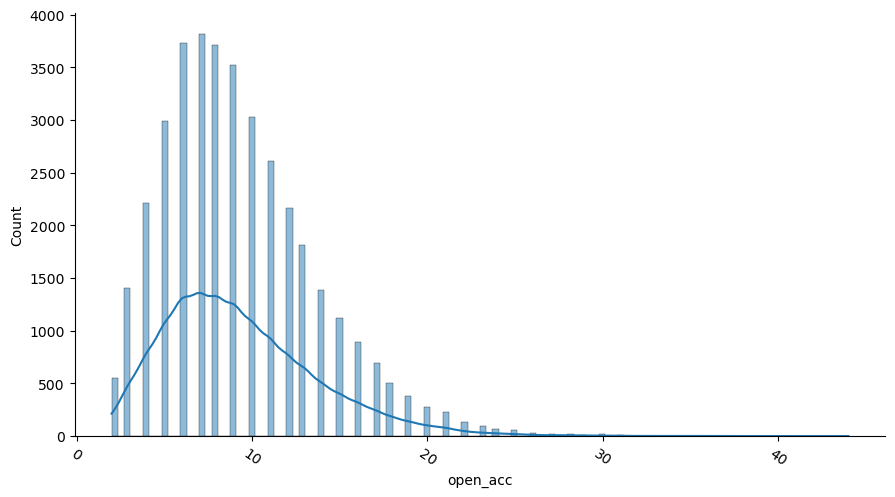

In [43]:
for column in loan1.columns:
    if column != 'loan_status':
        a = sns.displot(loan1[column], kde=True)
        a.fig.set_size_inches(10, 5)
        plt.xticks(rotation=-35)
        print('\n')
        plt.show()

Very few data columns are normally distributed.

In order to perfrom visualization with other columns, it would be better if we group them into discrete data for better understanding and analysis.

Columns like - loan_amnt, funded_amnt, funded_amnt_inv, int_rate, installment, annual_inc, issue_d, dti and open_acc need to be grouped in order to use them for further analysis.

In [44]:
# Grouping loan_amnt, funded_amnt, funded_amnt_inv

def amount(val):
    if val < 5000:
        return 'low'
    elif val >=5000 and val < 15000:
        return 'medium'
    elif val >= 15000 and val < 25000:
        return 'high'
    else:
        return 'very high'

In [45]:
loan1['loan_amnt'] = loan1['loan_amnt'].apply(lambda x: amount(x))
loan1['funded_amnt'] = loan1['funded_amnt'].apply(lambda x: amount(x))
loan1['funded_amnt_inv'] = loan1['funded_amnt_inv'].apply(lambda x: amount(x))

In [46]:
loan1['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

In [47]:
loan1['funded_amnt'].value_counts()

medium       20625
high          7416
low           7188
very high     2315
Name: funded_amnt, dtype: int64

In [48]:
loan1['funded_amnt_inv'].value_counts()

medium       20510
low           9040
high          6658
very high     1336
Name: funded_amnt_inv, dtype: int64

In [49]:
# Extracting months and years from 'issue_d' column using datetime function.

loan1['issue_d'] = loan1['issue_d'].apply(lambda x: dt.strptime(x, '%b-%y'))
loan1['month'] = loan1['issue_d'].apply(lambda x: x.month)
loan1['year'] = loan1['issue_d'].apply(lambda x: x.year)

In [50]:
print(loan1.groupby('month').month.count())

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64


In [51]:
print(loan1.groupby('year').month.count())

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: month, dtype: int64


In [52]:
# Now we can drop issue_d column since we have extracted month and year from that column.

loan1 = loan1.drop('issue_d', axis=1)

In [53]:
# Grouping int_rate into discrete data

def rate(val):
    if val <= 10:
        return 'low'
    elif val > 10 and val <=15:
        return 'medium'
    else:
        return 'high'

In [54]:
loan1['int_rate'] = loan1['int_rate'].apply(lambda x: rate(x))
loan1['int_rate'].value_counts()

medium    17880
low       11834
high       7830
Name: int_rate, dtype: int64

In [55]:
# Grouping debt to income ratio (dti) in discrete data

def dti(val):
    if val <= 10:
        return 'low'
    elif val > 10 and val <=20:
        return 'medium'
    else:
        return 'high'

In [56]:
loan1['dti'] = loan1['dti'].apply(lambda x: dti(x))
loan1['dti'].value_counts()

medium    18002
low       12545
high       6997
Name: dti, dtype: int64

In [57]:
# Grouping installment into discrete data

def installment(val):
    if val <= 200:
        return 'low'
    elif val > 200 and val <=400:
        return 'medium'
    elif val > 400 and val <=600:
        return 'high'
    else:
        return 'very high'

In [58]:
loan1['installment'] = loan1['installment'].apply(lambda x: installment(x))
loan1['installment'].value_counts()

medium       14390
low          12544
high          6458
very high     4152
Name: installment, dtype: int64

In [59]:
# Grouping annual_inc into discerte data

def income(val):
    if val <= 50000:
        return 'low'
    elif val > 50000 and val <=100000:
        return 'medium'
    elif val > 100000 and val <=150000:
        return 'high'
    else:
        return 'very high'

In [60]:
loan1['annual_inc'] = loan1['annual_inc'].apply(lambda x: income(x))
loan1['annual_inc'].value_counts()

medium       17433
low          14678
high          3963
very high     1470
Name: annual_inc, dtype: int64

In [61]:
# Grouping emp_length into discrete data

def emp_length(val):
    if val <= 1:
        return 'fresher'
    elif val > 1 and val <=3:
        return 'junior'
    elif val > 3 and val <=7:
        return 'senior'
    else:
        return 'expert'

In [62]:
loan1['emp_length'] = loan1['emp_length'].apply(lambda x: emp_length(x))
loan1['emp_length'].value_counts()

expert     11149
senior     10415
junior      8303
fresher     7677
Name: emp_length, dtype: int64

In [63]:
# Grouping open_acc into discrete data

def open_act(val):
    if val <= 10:
        return 'low'
    elif val > 10 and val <=20:
        return 'medium'
    elif val > 20 and val <=30:
        return 'high'
    else:
        return 'very high'

In [64]:
loan1['open_acc'] = loan1['open_acc'].apply(lambda x: open_act(x))
loan1['open_acc'].value_counts()

low          24995
medium       11842
high           678
very high       29
Name: open_acc, dtype: int64

In [65]:
# Before beginning with bivariate analysis, let's look at the unique count of each column data

for column in loan1.columns:
    print(column,':', loan1[column].nunique())
    print('-----------------------')

loan_amnt : 4
-----------------------
funded_amnt : 4
-----------------------
funded_amnt_inv : 4
-----------------------
term : 2
-----------------------
int_rate : 3
-----------------------
installment : 4
-----------------------
grade : 7
-----------------------
sub_grade : 35
-----------------------
emp_length : 4
-----------------------
home_ownership : 5
-----------------------
annual_inc : 4
-----------------------
verification_status : 3
-----------------------
loan_status : 2
-----------------------
purpose : 14
-----------------------
addr_state : 50
-----------------------
dti : 3
-----------------------
inq_last_6mths : 9
-----------------------
open_acc : 4
-----------------------
month : 12
-----------------------
year : 5
-----------------------


We can see that the unique values of each column has reduced a lot.

### 2. Bivariate Analysis

### Seperating numerical and categorical columns

In [66]:
categorical = []
numerical = []
for column in loan1.columns:
    if loan1[column].dtypes=='O':
        categorical.append(column)
    else:
        numerical.append(column)

In [67]:
print(categorical,'\n')
print('\n',numerical)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti', 'open_acc'] 


 ['loan_status', 'inq_last_6mths', 'month', 'year']


In [68]:
for column in categorical:
    print(loan1[column].value_counts())
    print('----------------------------------------------')

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64
----------------------------------------------
medium       20625
high          7416
low           7188
very high     2315
Name: funded_amnt, dtype: int64
----------------------------------------------
medium       20510
low           9040
high          6658
very high     1336
Name: funded_amnt_inv, dtype: int64
----------------------------------------------
36 months    28287
60 months     9257
Name: term, dtype: int64
----------------------------------------------
medium    17880
low       11834
high       7830
Name: int_rate, dtype: int64
----------------------------------------------
medium       14390
low          12544
high          6458
very high     4152
Name: installment, dtype: int64
----------------------------------------------
B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64
-----------------------------------------

In [69]:
for column in numerical:
    print(loan1[column].value_counts())
    print('----------------------------------------------')

0    32145
1     5399
Name: loan_status, dtype: int64
----------------------------------------------
0    18188
1    10386
2     5507
3     2913
4      302
5      142
6       60
7       32
8       14
Name: inq_last_6mths, dtype: int64
----------------------------------------------
12    4120
11    3890
10    3637
9     3394
8     3321
7     3253
6     3094
5     2838
4     2756
3     2632
1     2331
2     2278
Name: month, dtype: int64
----------------------------------------------
2011    19801
2010    11214
2009     4716
2008     1562
2007      251
Name: year, dtype: int64
----------------------------------------------


### Seperating discrete and continuous features from numerical data columns

In [70]:
discrete = []
continuous = []
for column in numerical:
    if len(loan1[column].unique()) <= 12:        
        discrete.append(column)
    else:        
        continuous.append(column)
      
print(discrete,'\n')
print('\n',continuous,'\n')

['loan_status', 'inq_last_6mths', 'month', 'year'] 


 [] 



We have no continuous numerical data to work with.

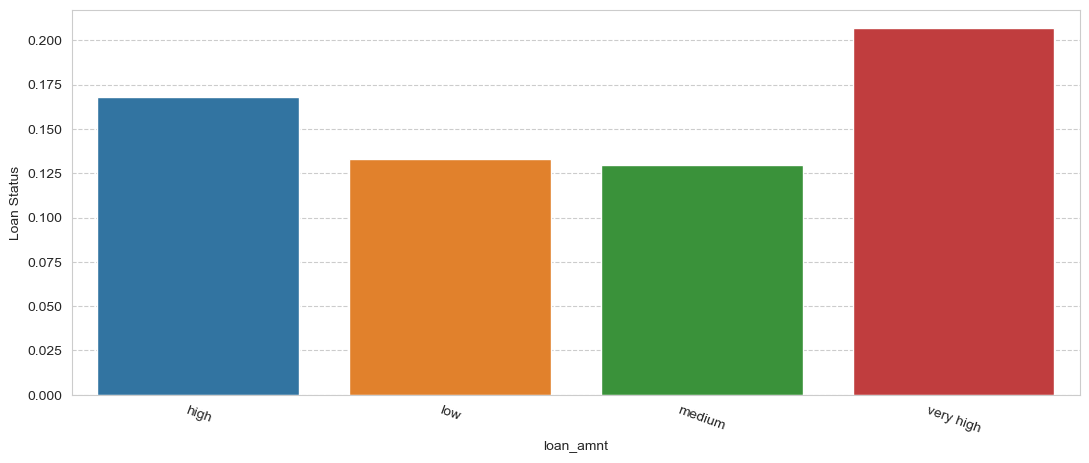

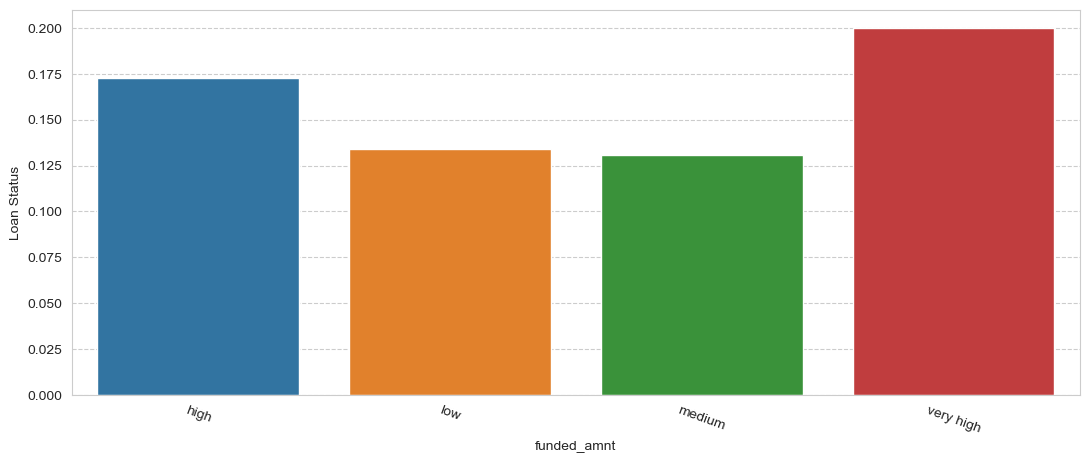

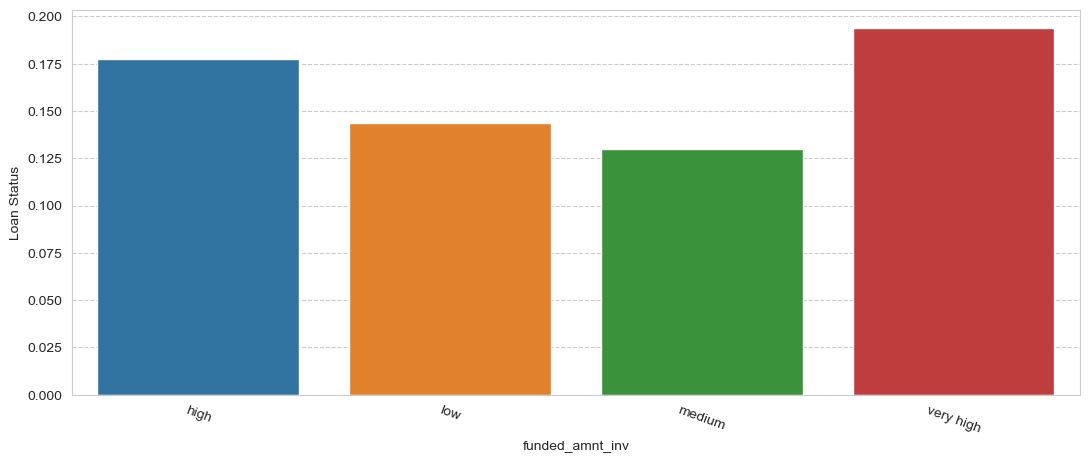

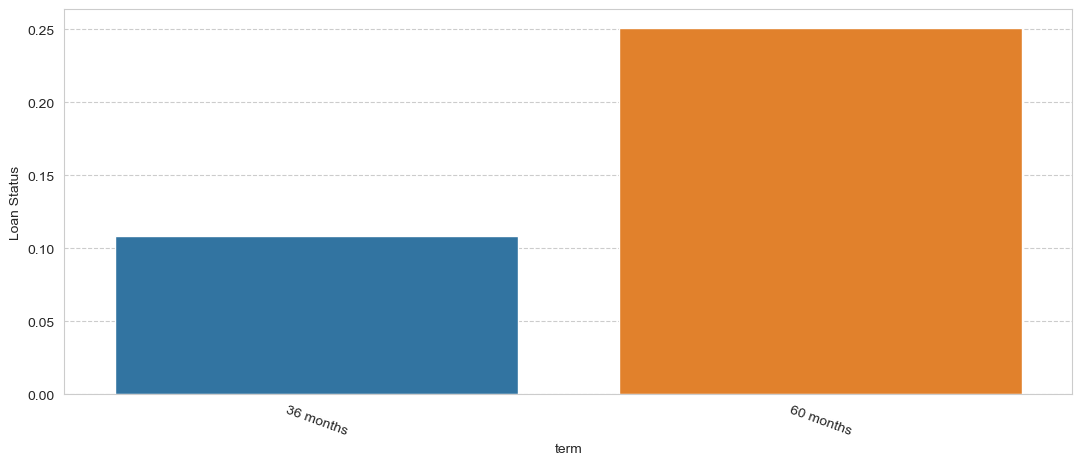

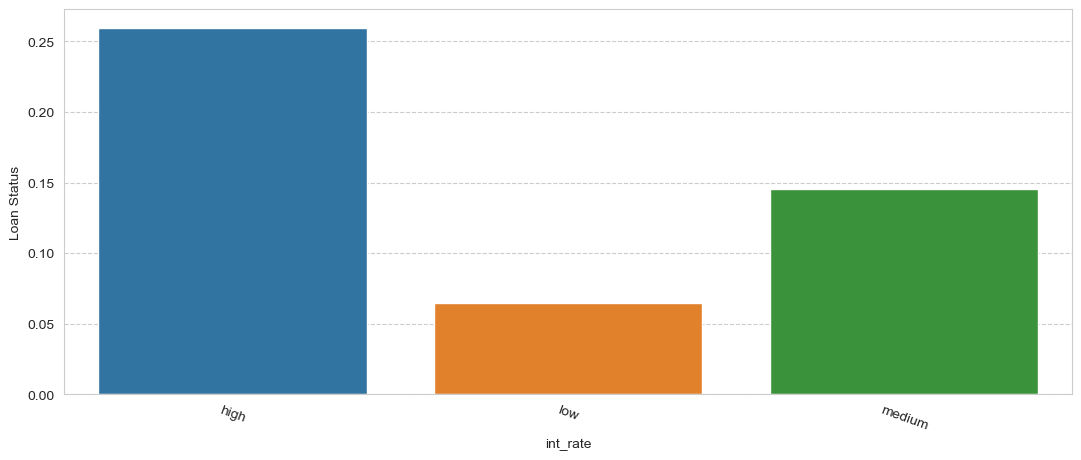

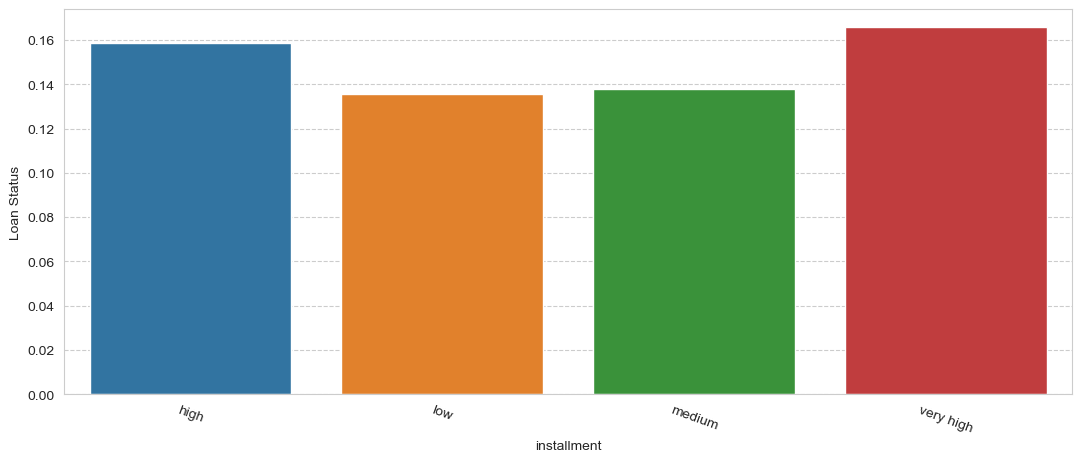

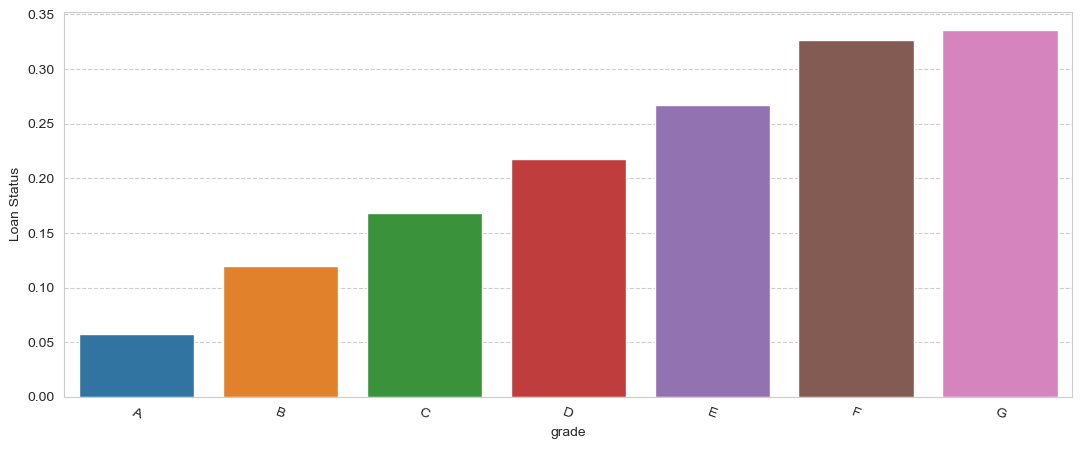

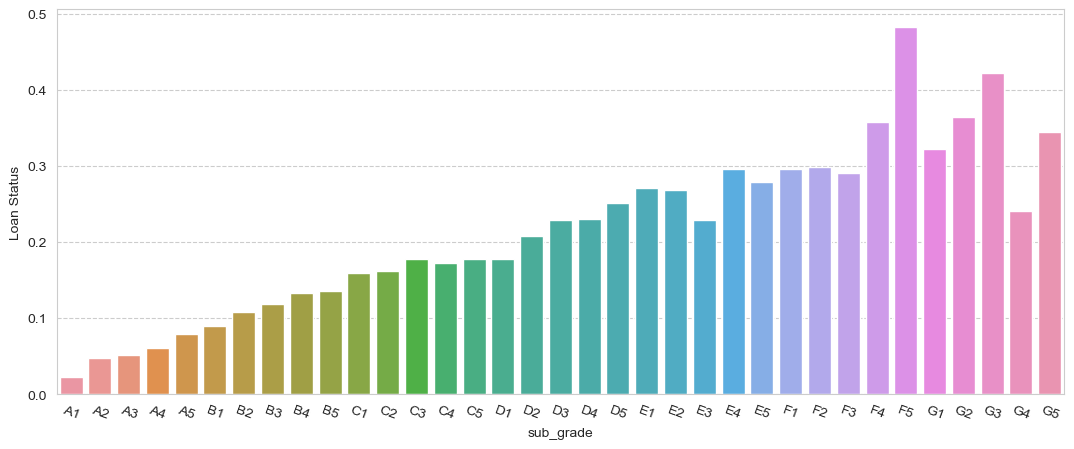

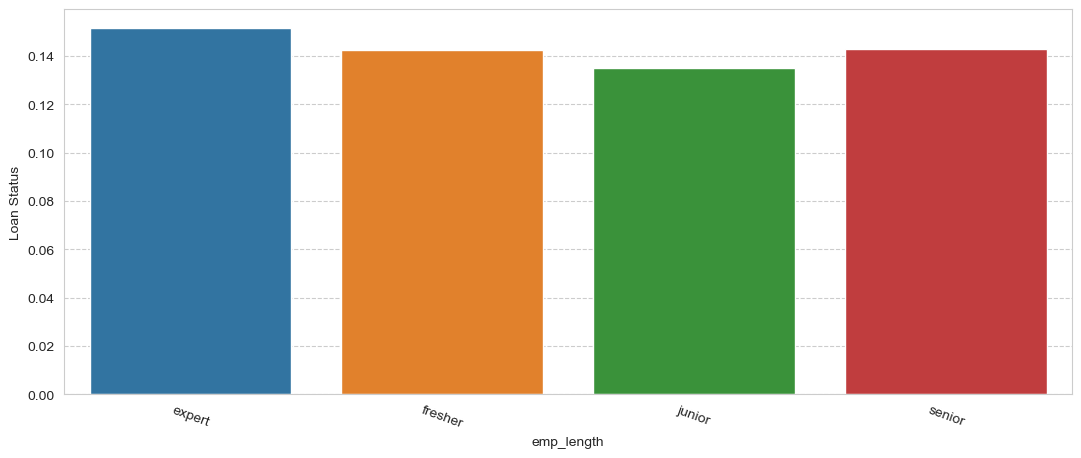

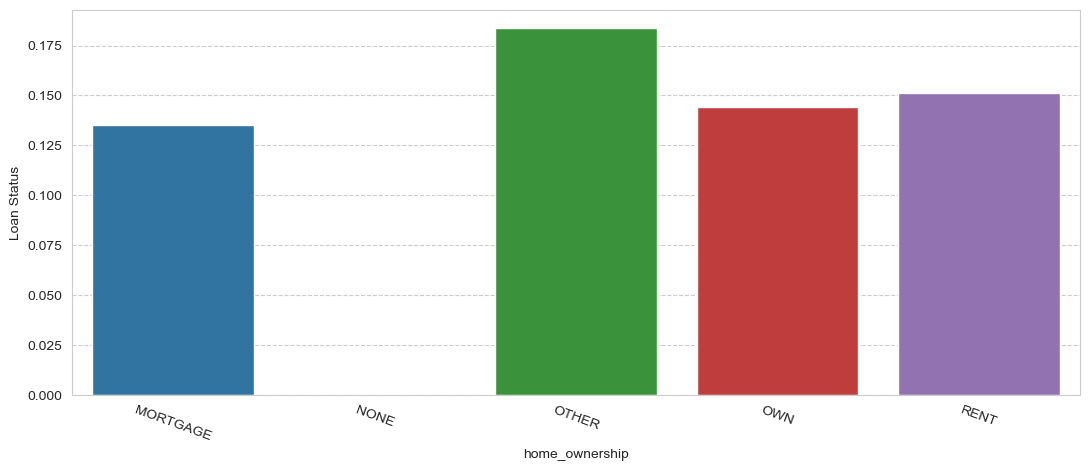

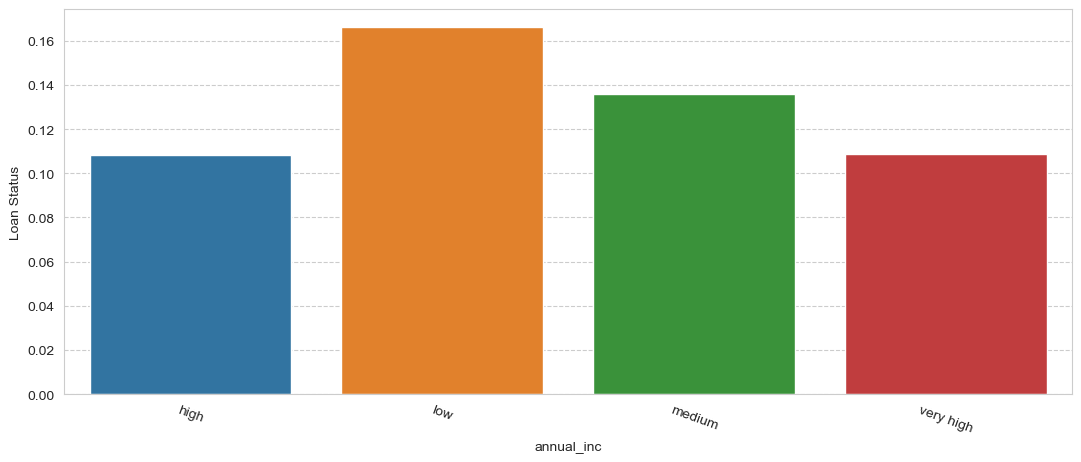

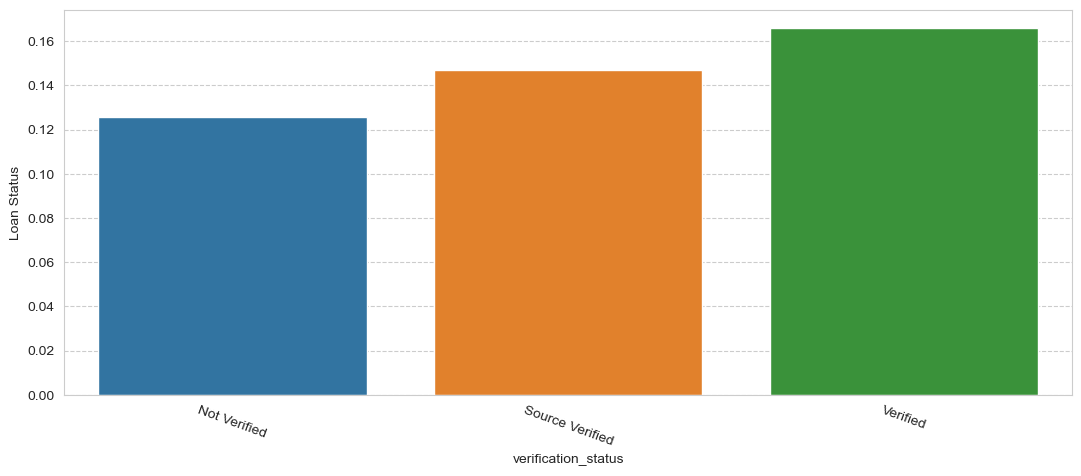

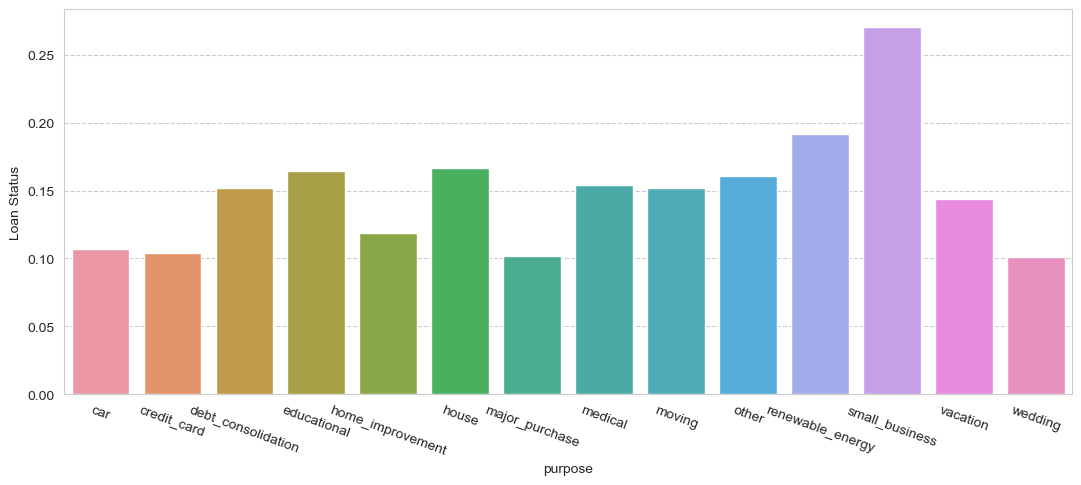

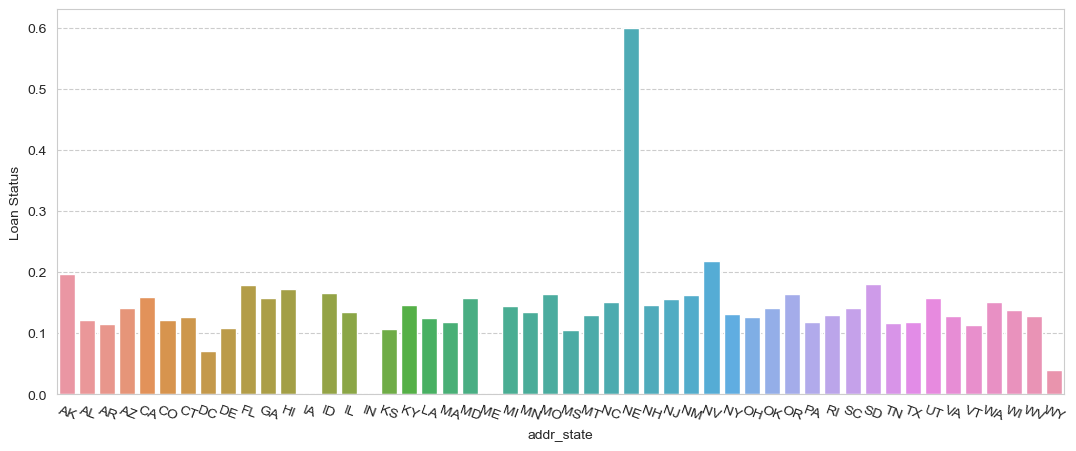

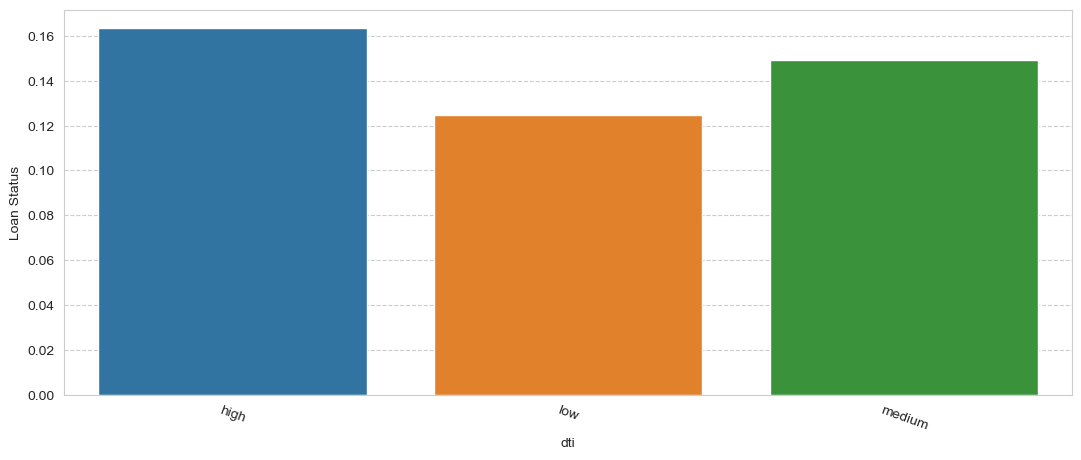

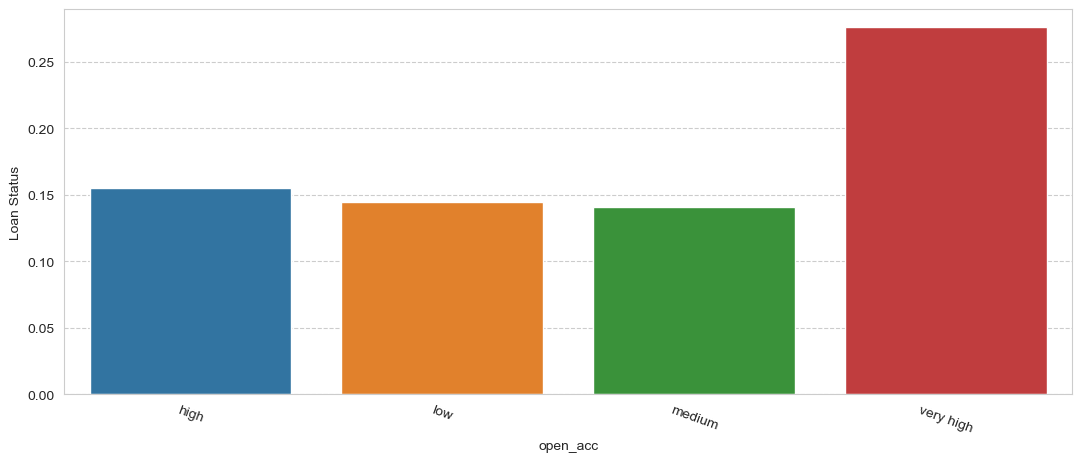

In [71]:
# Plotting 'loan_status' with every categorical column

for column in categorical:
    plt.figure(figsize=(13,5))
    sns.set_style("whitegrid", {'grid.linestyle': '--'})
    data = loan1.groupby(column)['loan_status'].mean()
    data = pd.DataFrame(data)
    sns.barplot(x=data.index, y=data.loan_status)
    plt.xticks(rotation=-20)
    plt.xlabel(column)
    plt.ylabel("Loan Status")
    print('\n')
    plt.show()

After viewing the above plots for categorical data columns with loan status we can that:
1. Since loan amount, funded amount and funded amount investor are correlated to each other so we can say that applicants with very high loan amount are more likely to be defaulters.
2. Applicants with loan term of 60 months are more likely to be defaulters.
3. Applicants with high interest rate are highly likely to be defaulters
4. Applicants with grade D,E,F,H are more likely to be defaulters.
5. Similarly applicants with sub-grade F4,F5,G1,G2,G3,G5 are very likely to be defaulters.
6. Applicants with home ownership as 'others' can be defaulters
7. Applicants with low annual income are more likely to be defaulters.
8. Applicants with the purpose of 'small business' are very likely to be defauers.
9. Applicants with the address state as 'NE' are very much defaulters.
10. Applicants with very high open account count are most likely to be defaulters.

Data columns like installment, employee length, verification status and dti did not help much in determining the factors for defaulters.

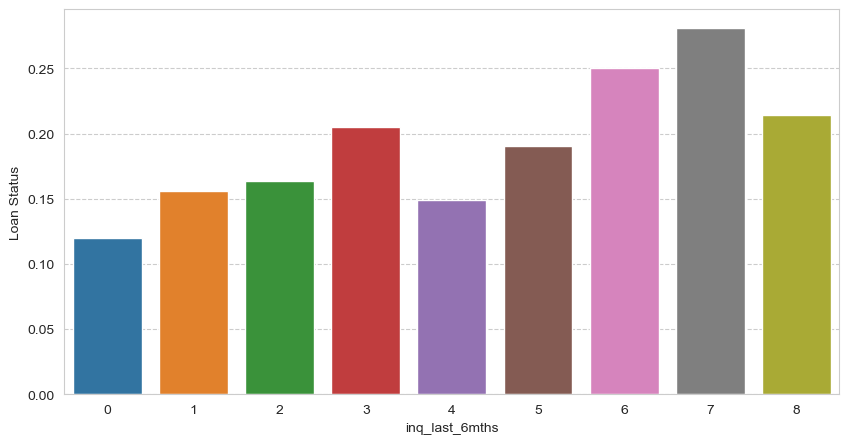

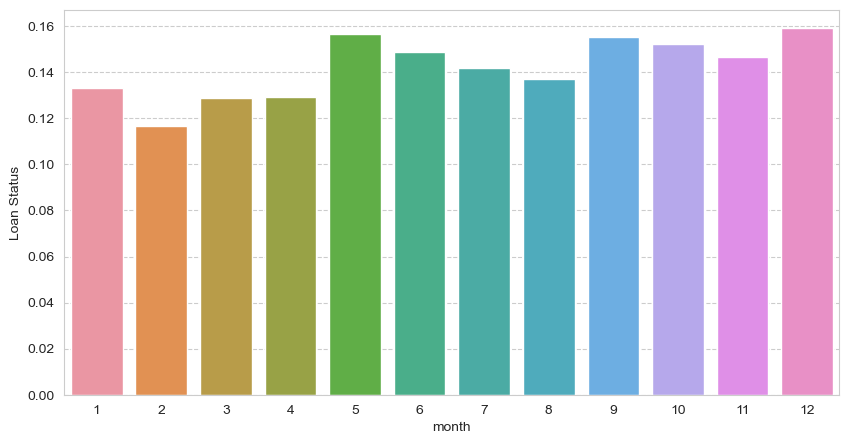

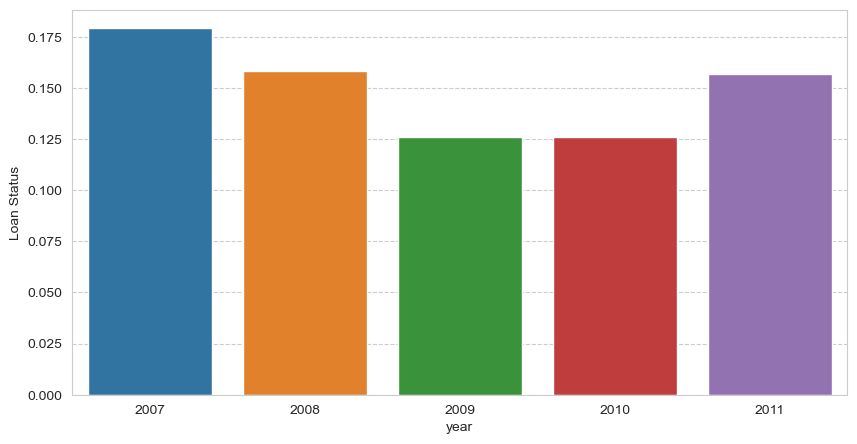

In [72]:
# Plotting 'loan_status' with every discrete numerical column

for column in discrete:
    if column != 'loan_status':
        plt.figure(figsize=(10,5))
        sns.set_style("whitegrid", {'grid.linestyle': '--'})
        data = loan1.groupby(column)['loan_status'].mean()
        data = pd.DataFrame(data)
        sns.barplot(x=data.index, y=data.loan_status)
        plt.xlabel(column)
        plt.ylabel("Loan Status")
        print('\n')
        plt.show()

Plotting discrete data columns also did not help much in making any decisions.

### Multivariate Analysis

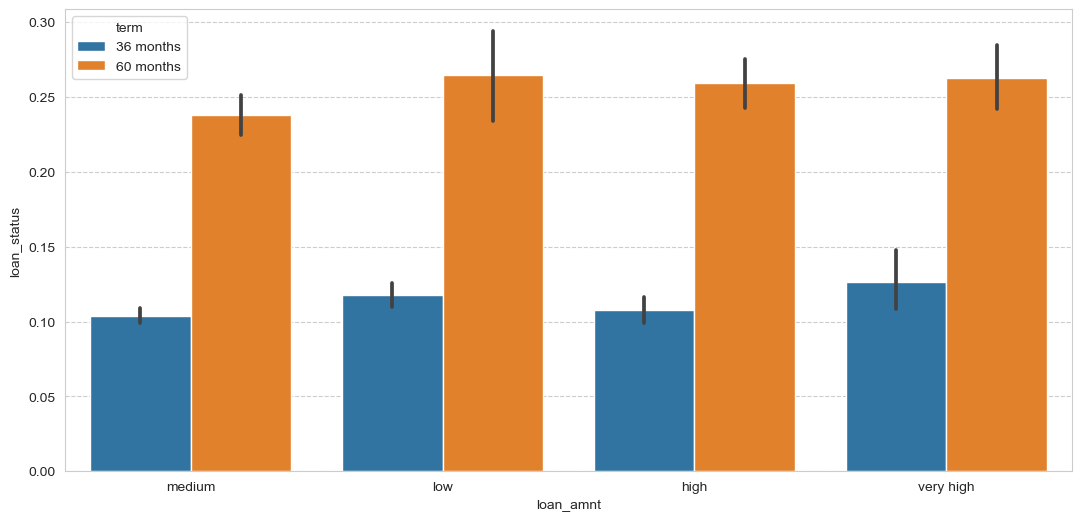

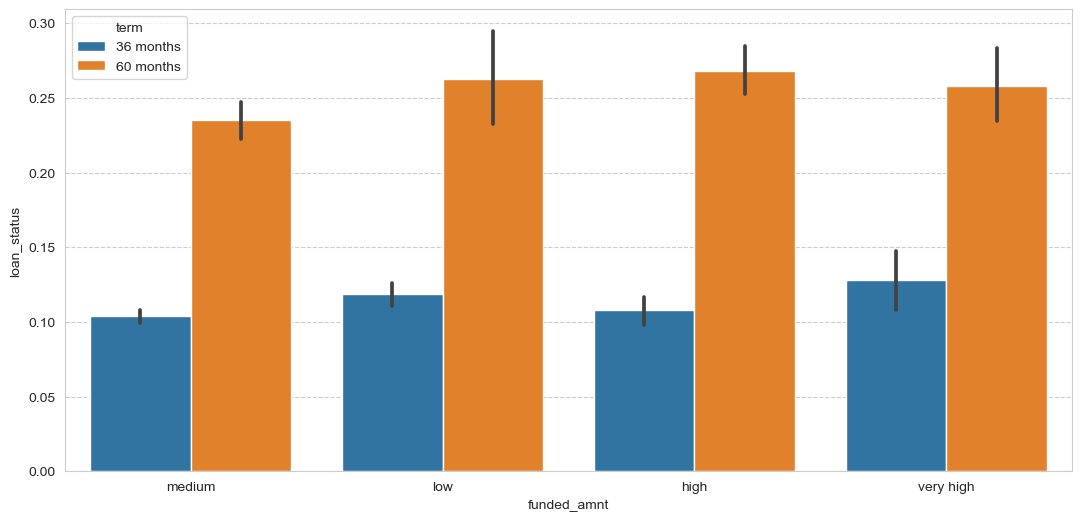

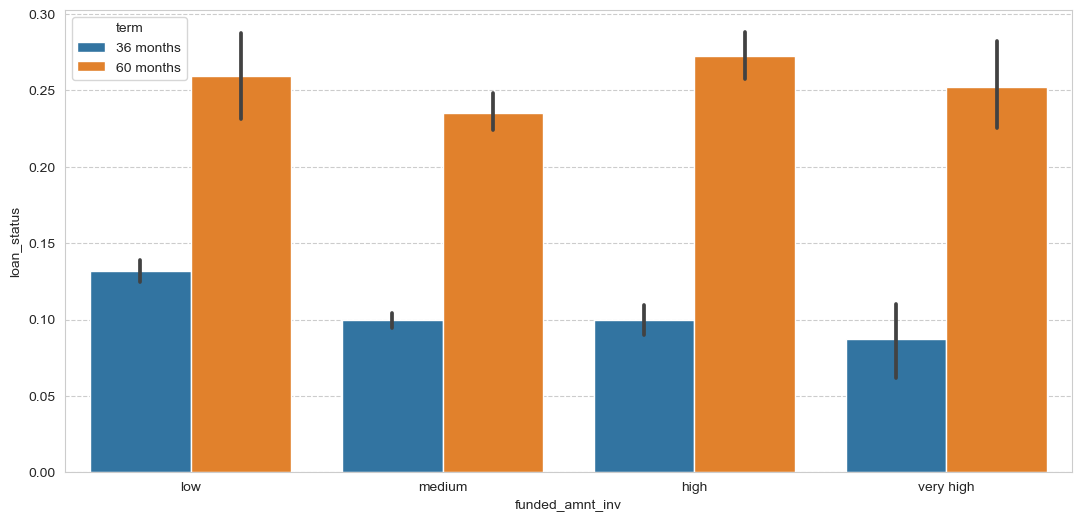

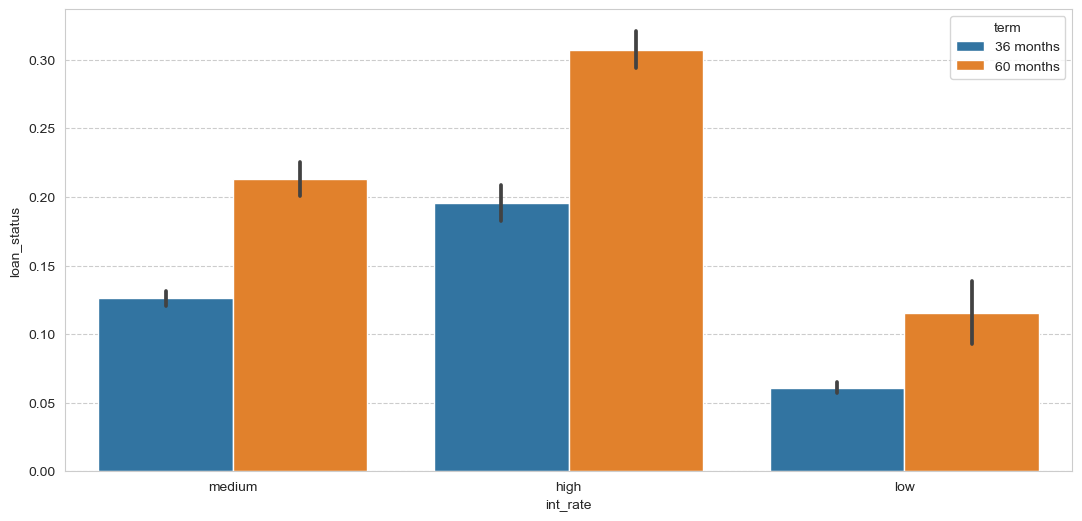

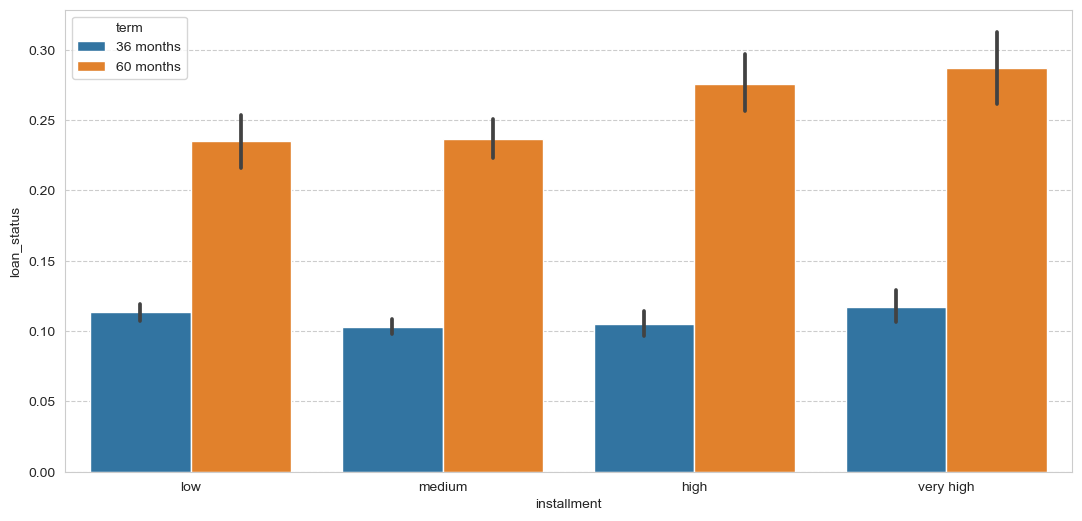

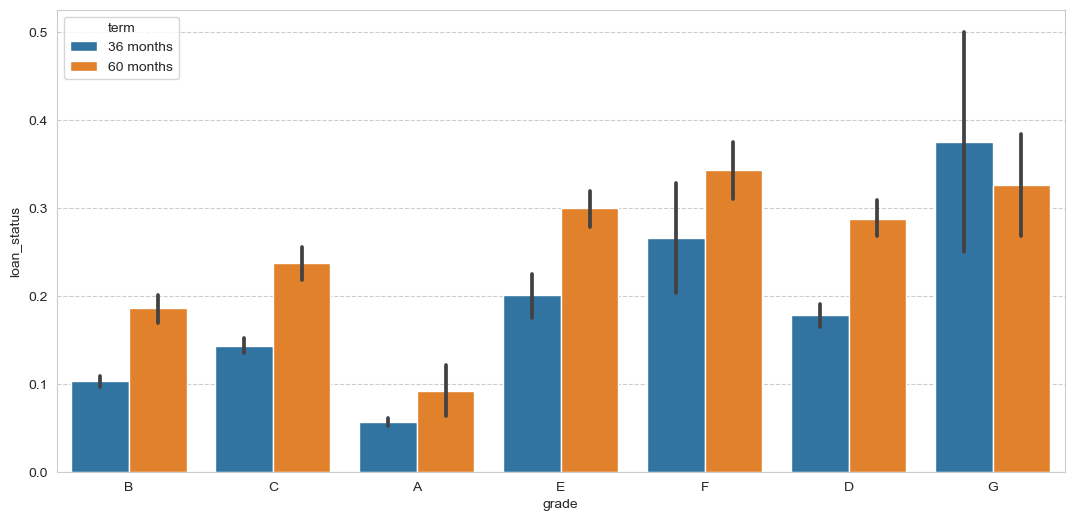

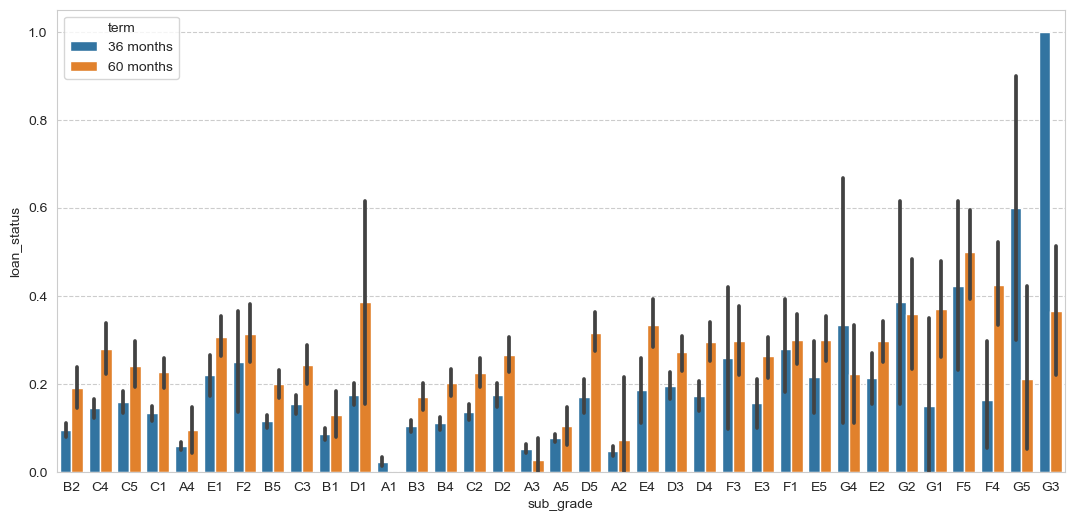

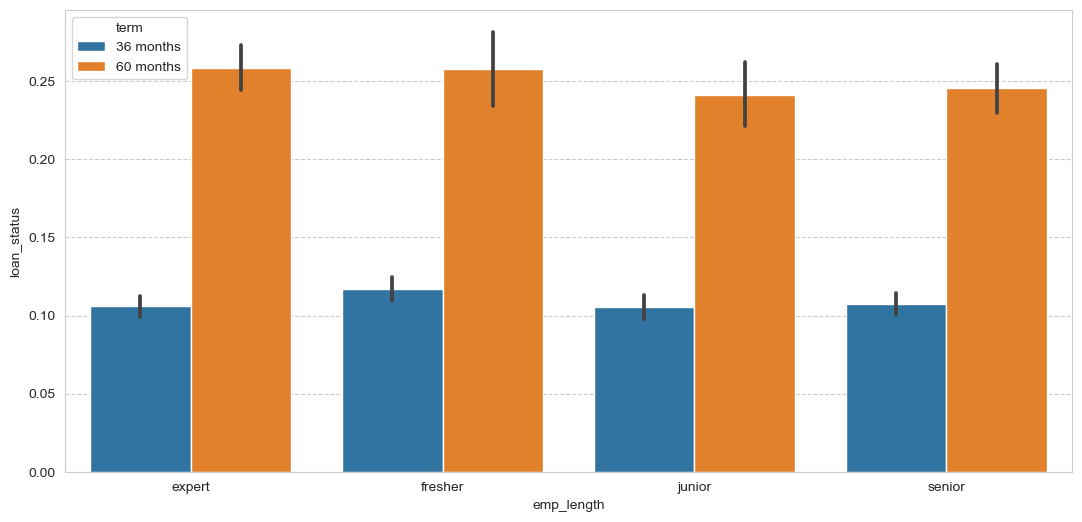

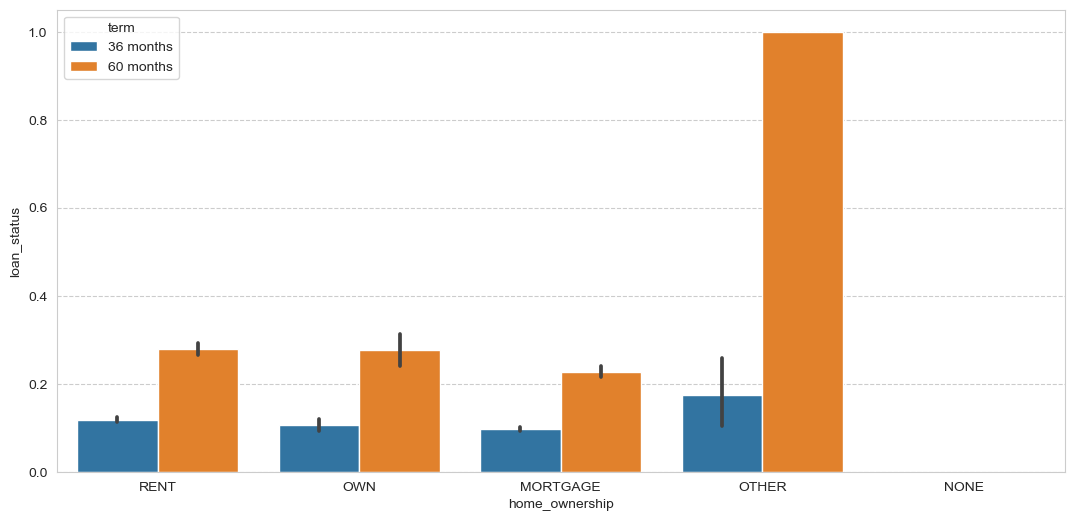

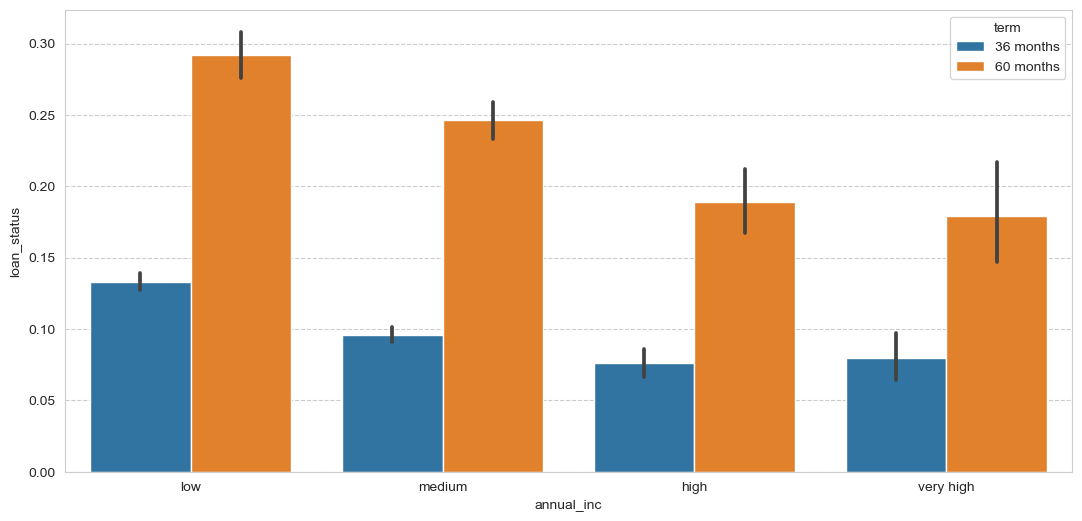

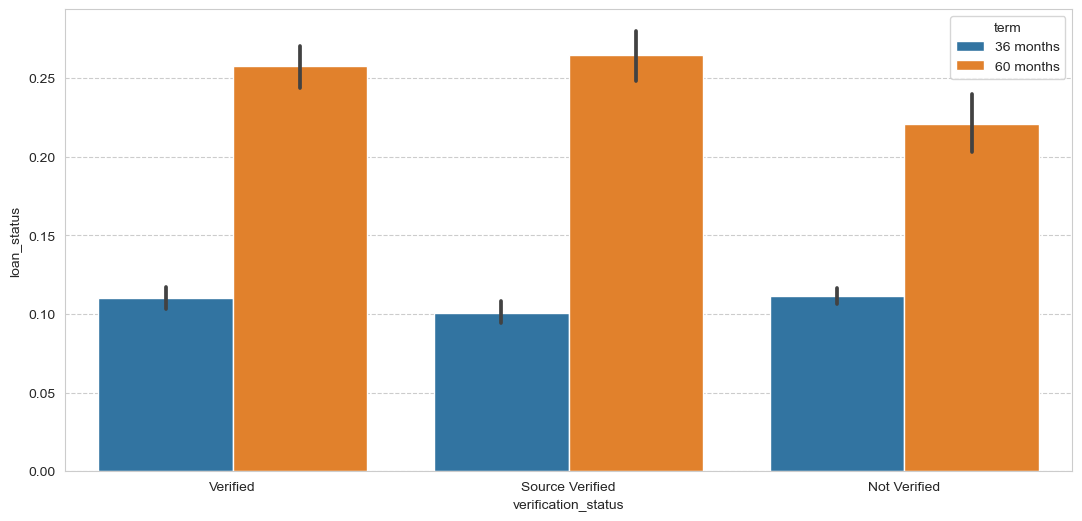

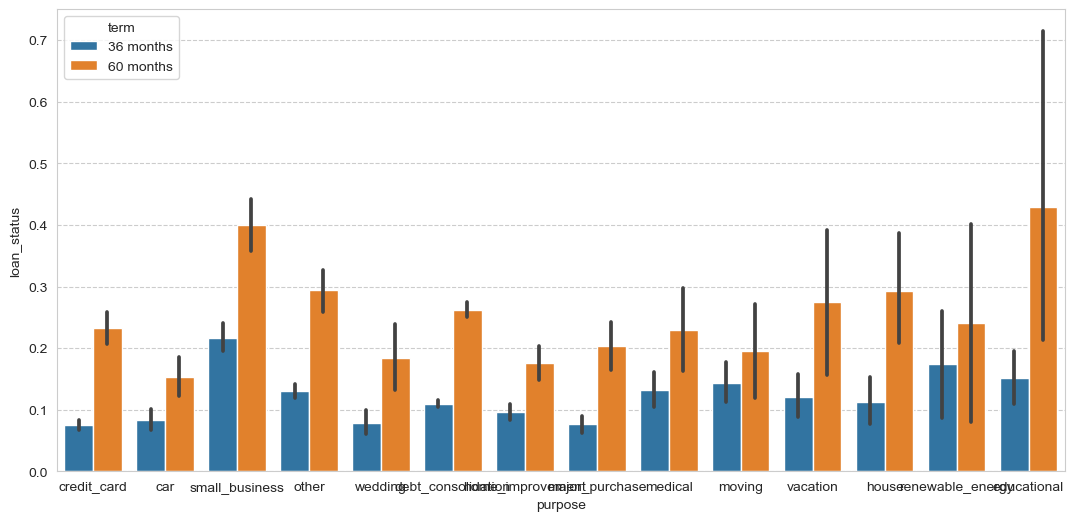

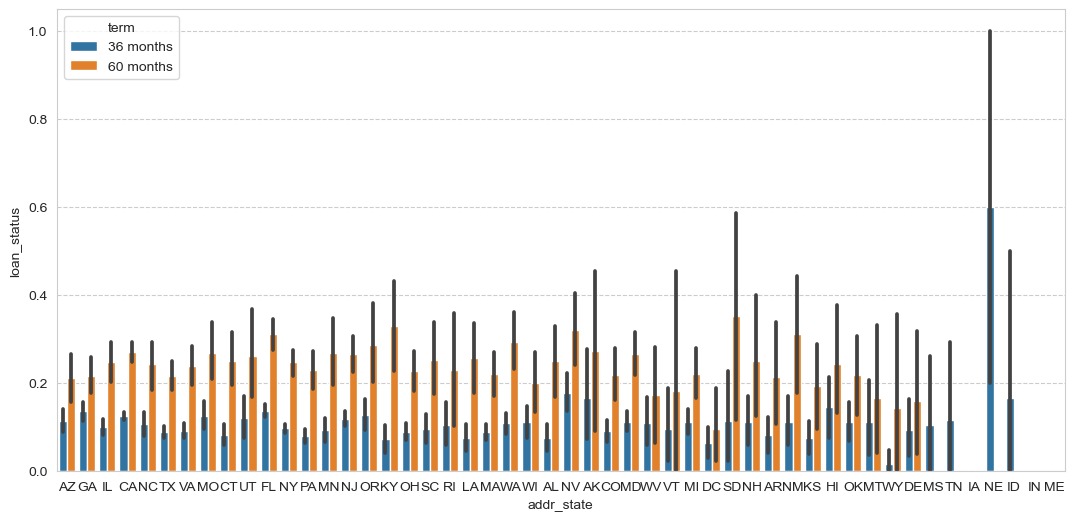

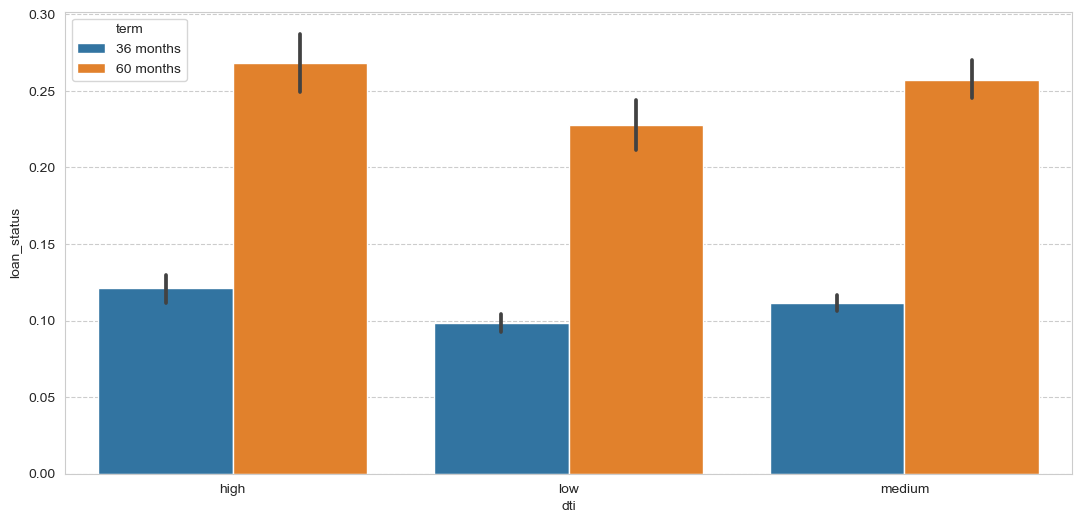

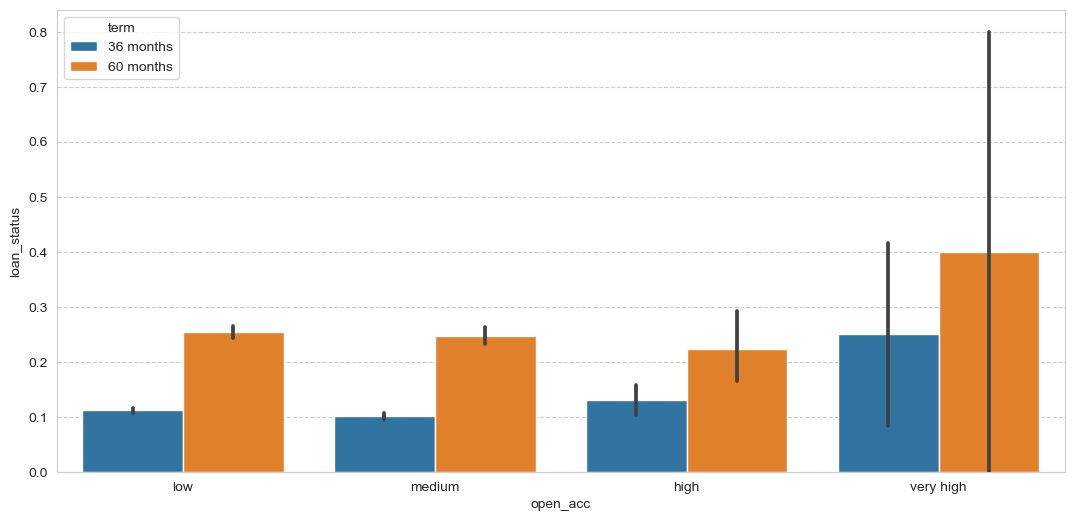

In [73]:
# Looking at each categorical data column with 'term' as hue

for column in categorical:
    if column != 'term':         
        plt.figure(figsize=(13, 6))
        sns.barplot(x=column, y='loan_status', hue='term', data=loan1)
        print('\n')
        plt.show()

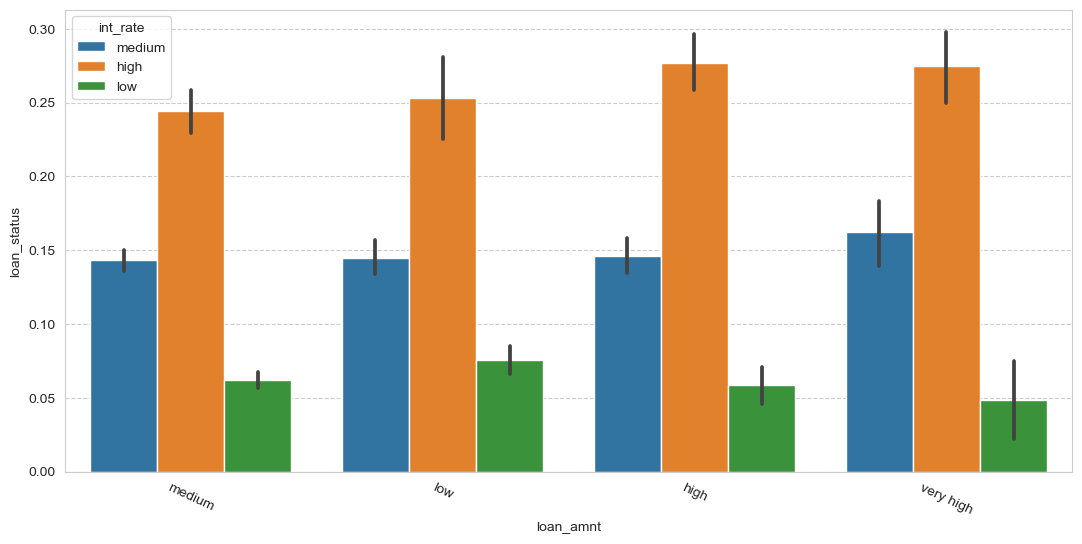

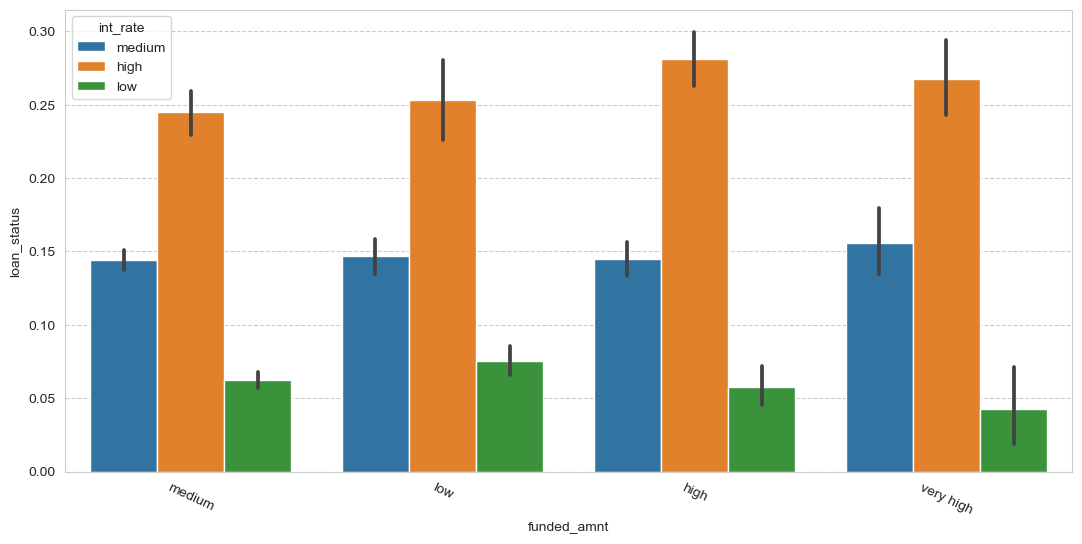

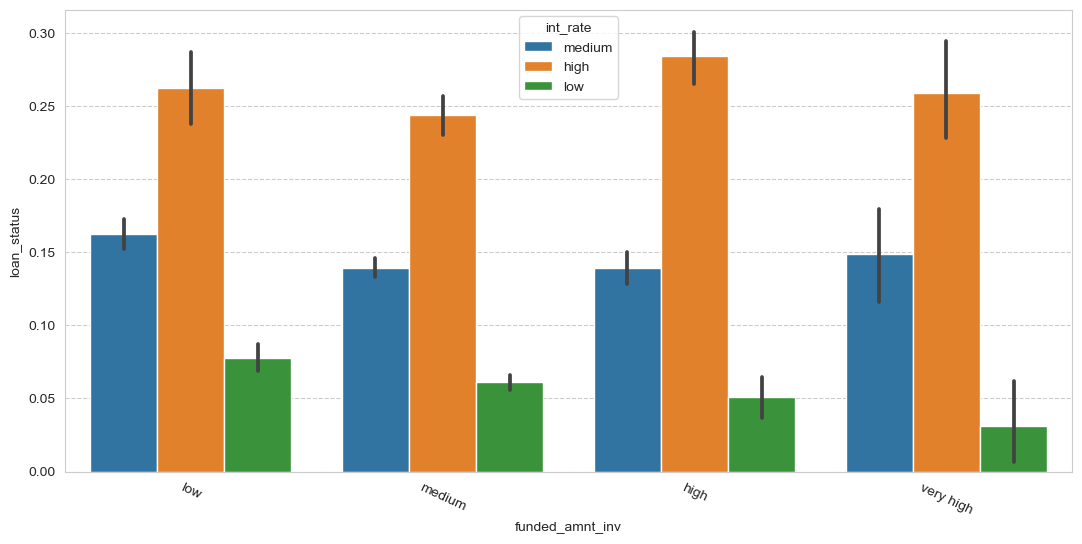

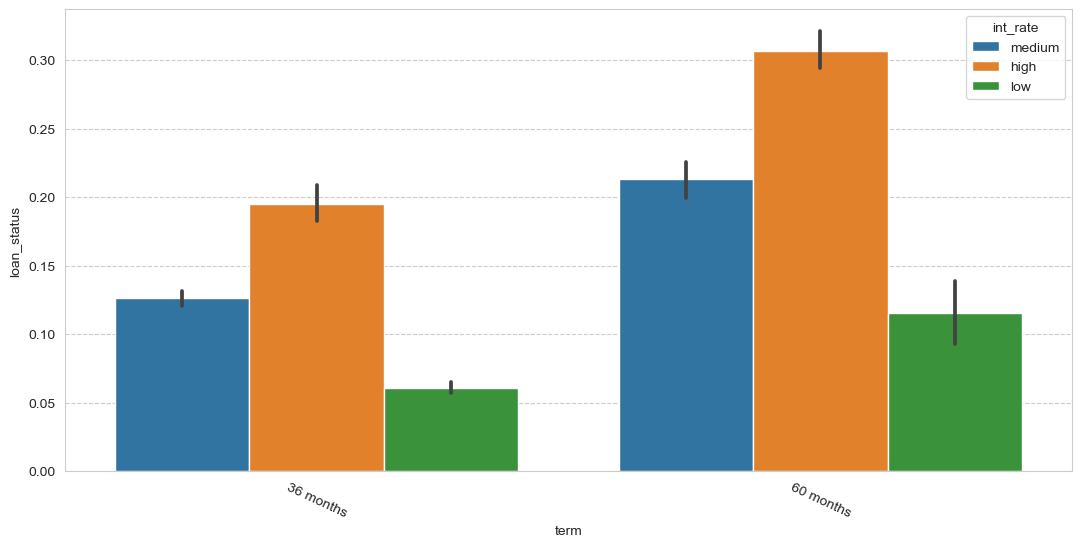

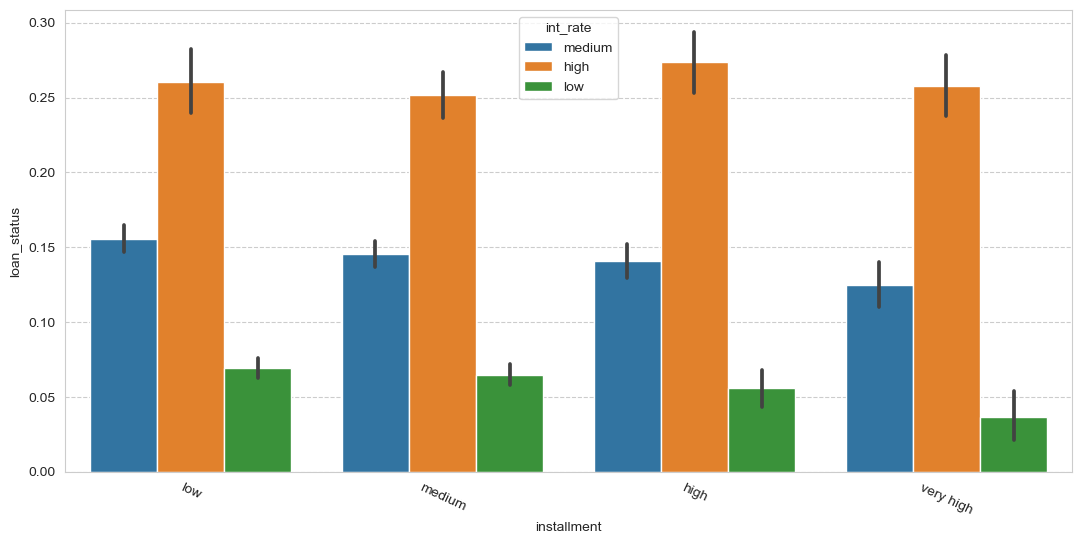

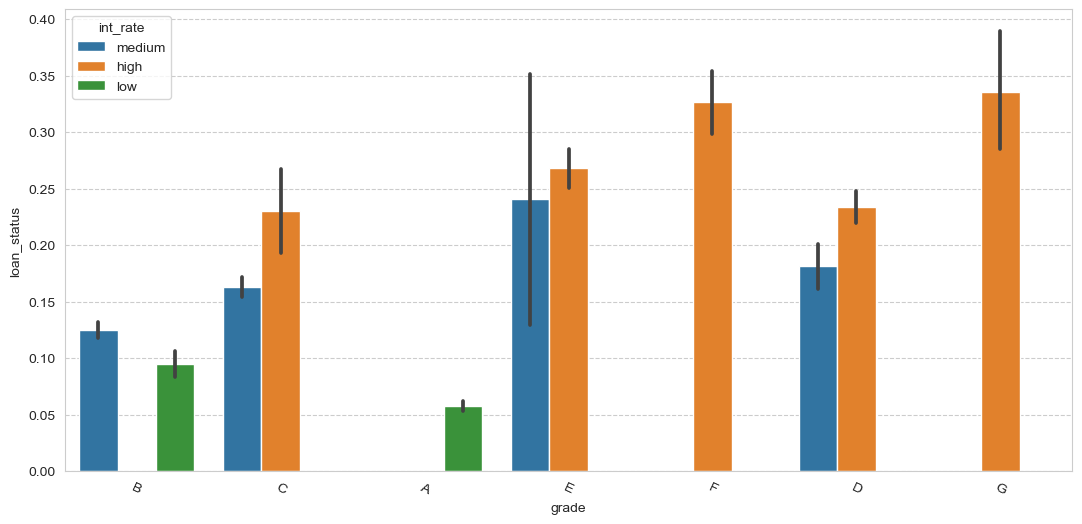

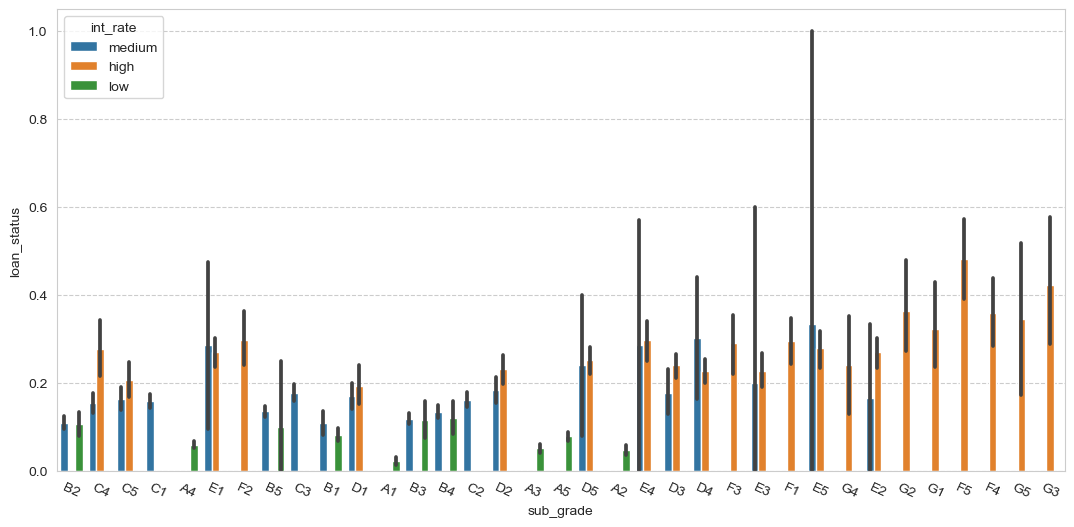

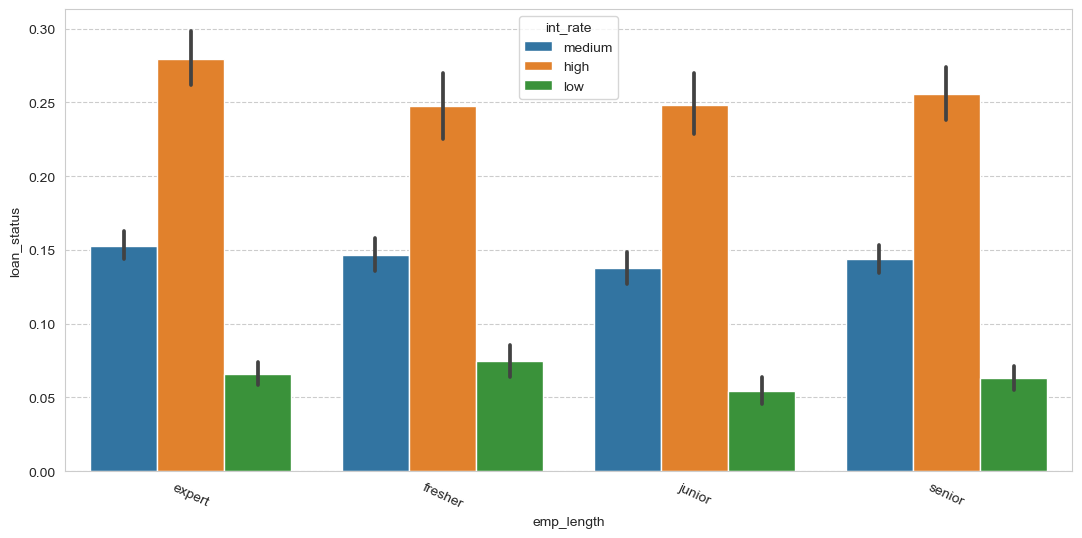

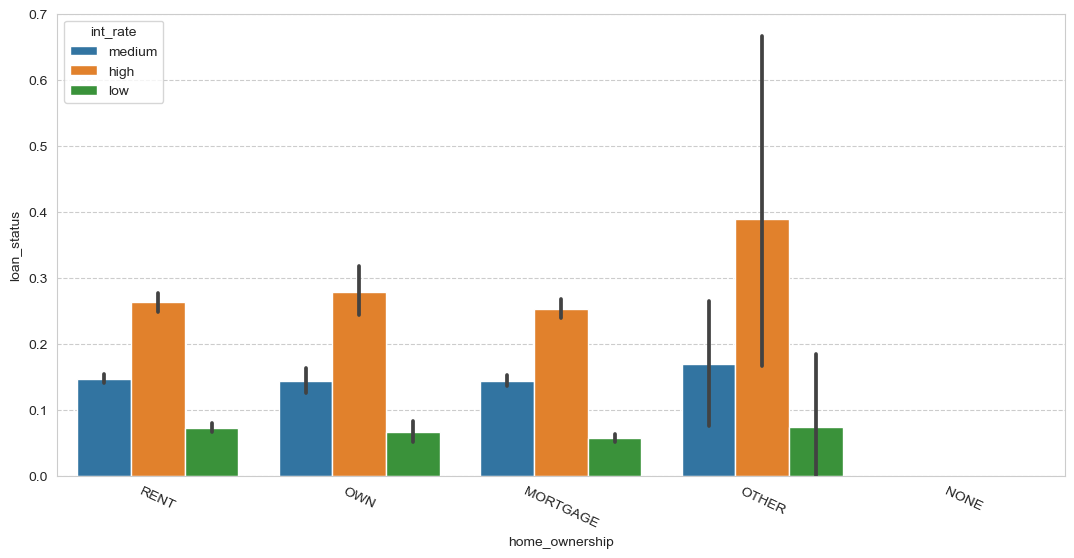

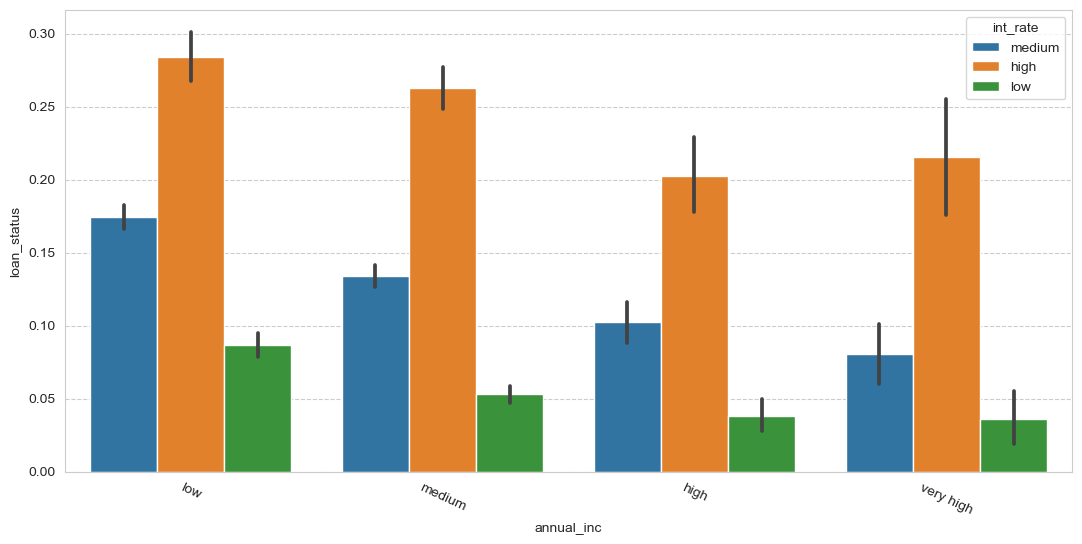

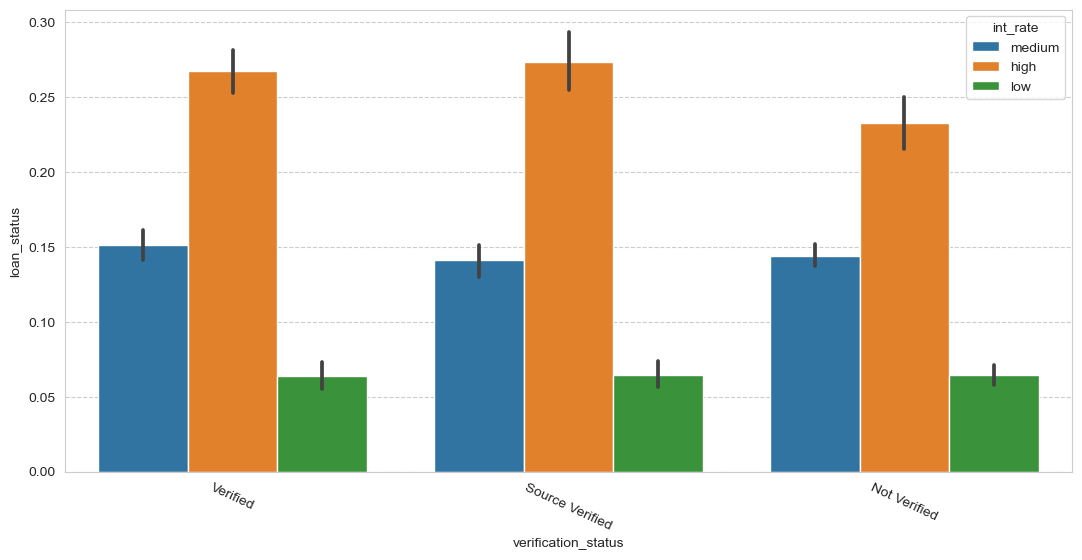

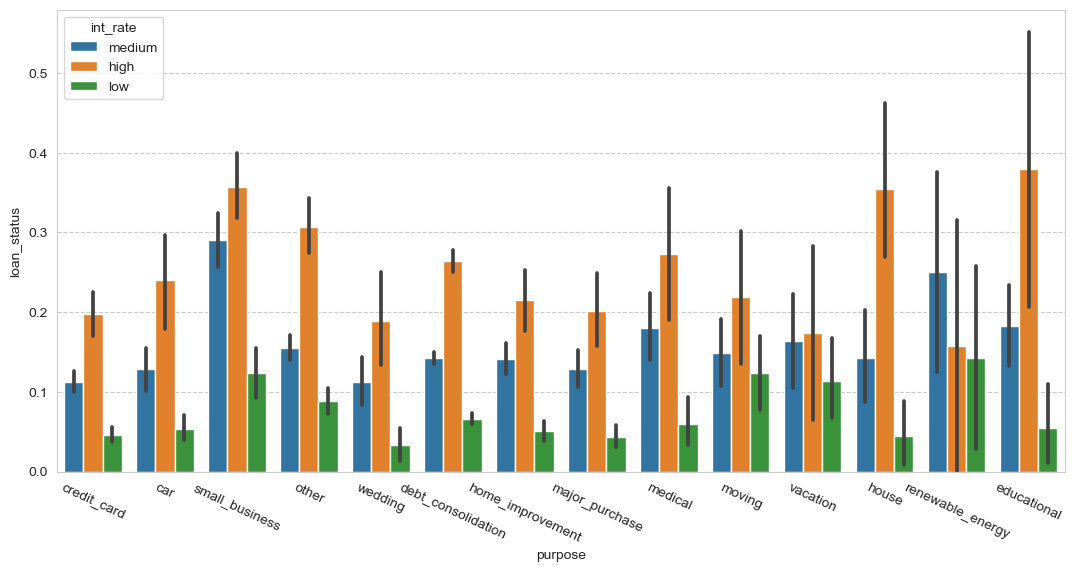

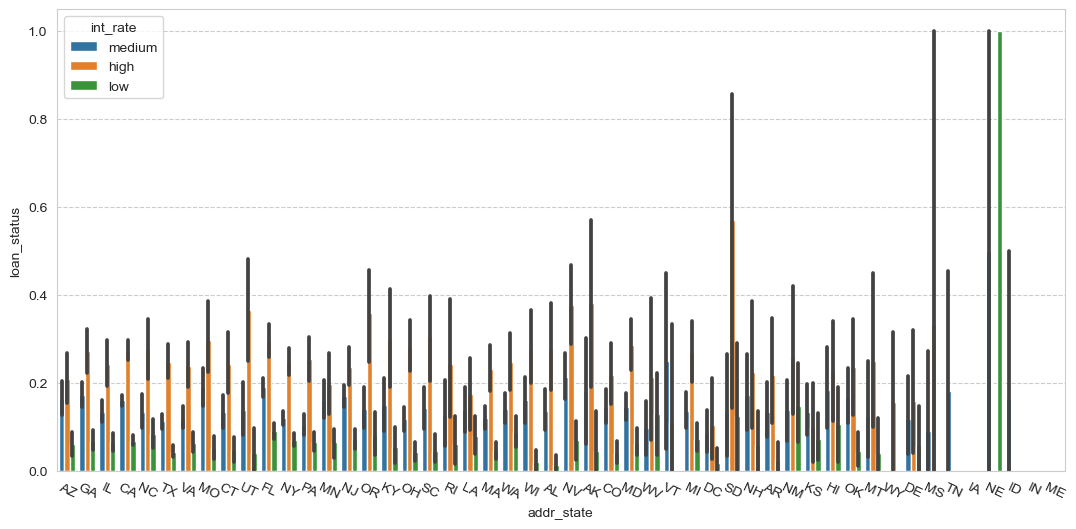

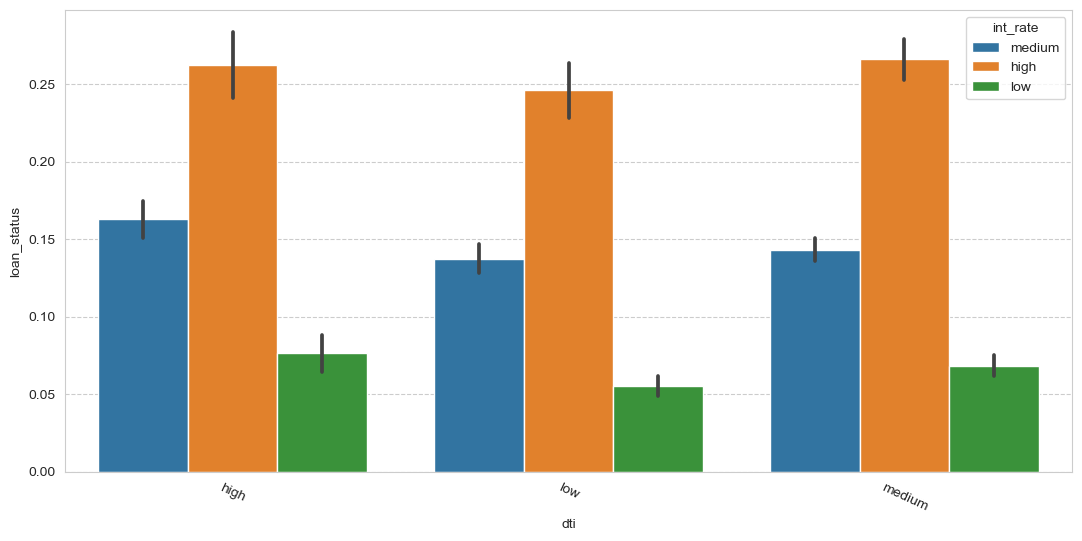

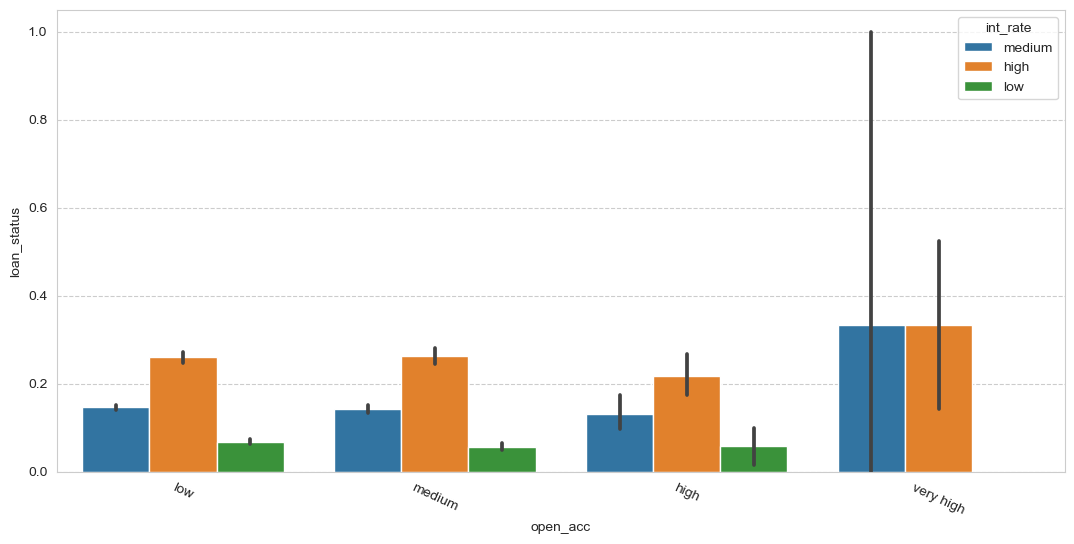

In [74]:
# Looking at each categorical data column with 'int_rate' as hue

for column in categorical:
    if column != 'int_rate':         
        plt.figure(figsize=(13, 6))
        sns.barplot(x=column, y='loan_status', hue='int_rate', data=loan1)
        plt.xticks(rotation=-25)
        print('\n')
        plt.show()

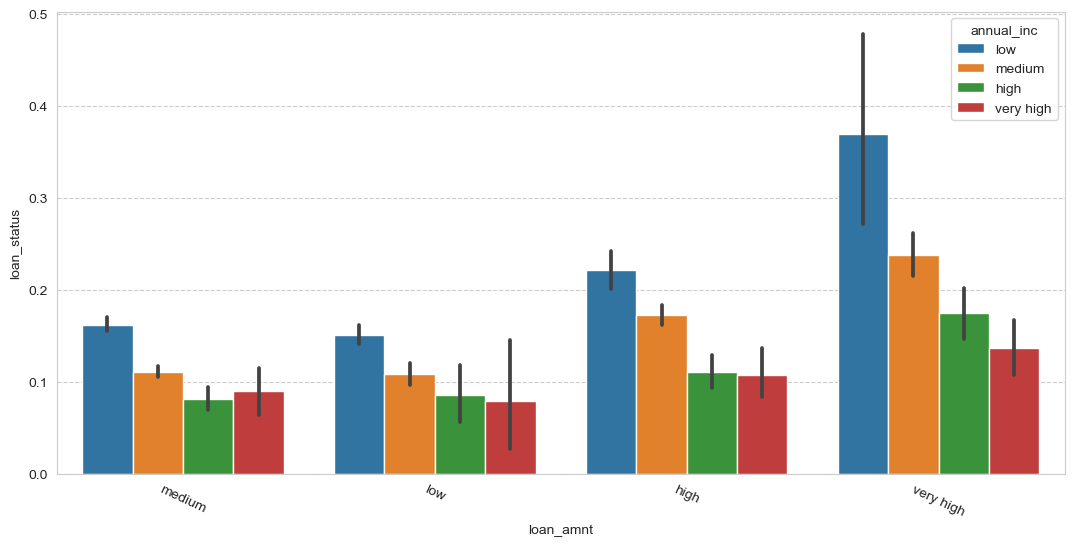

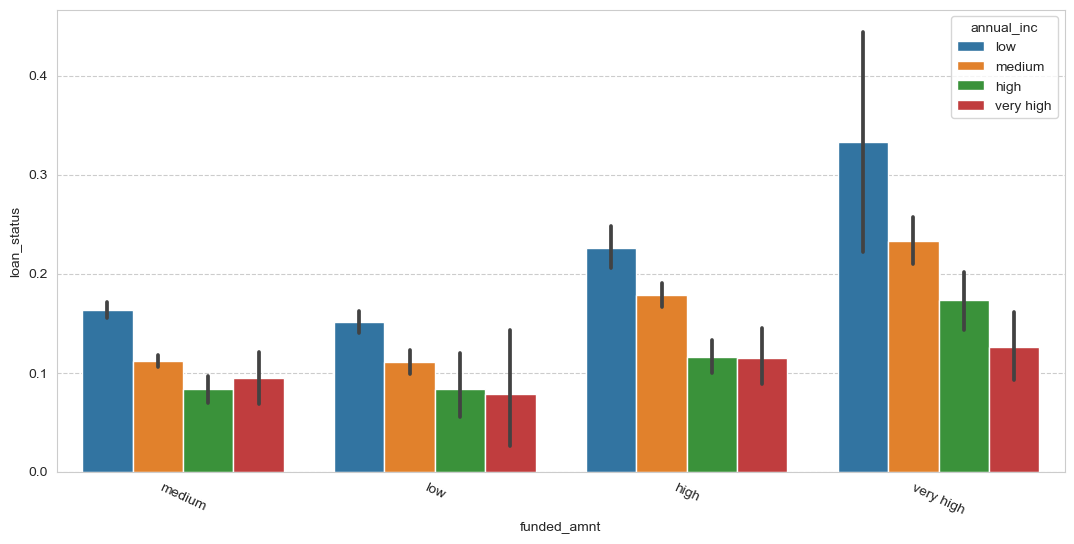

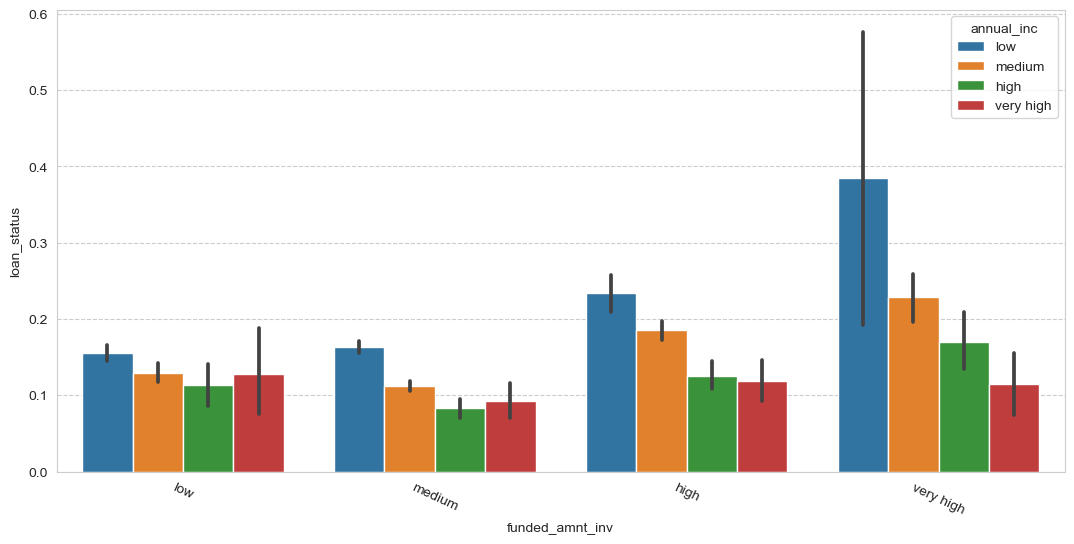

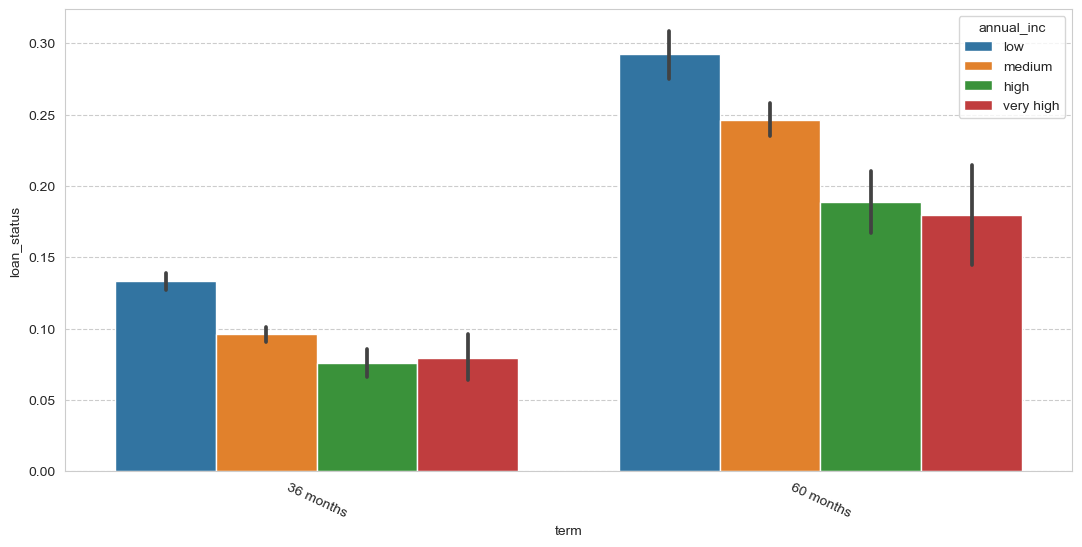

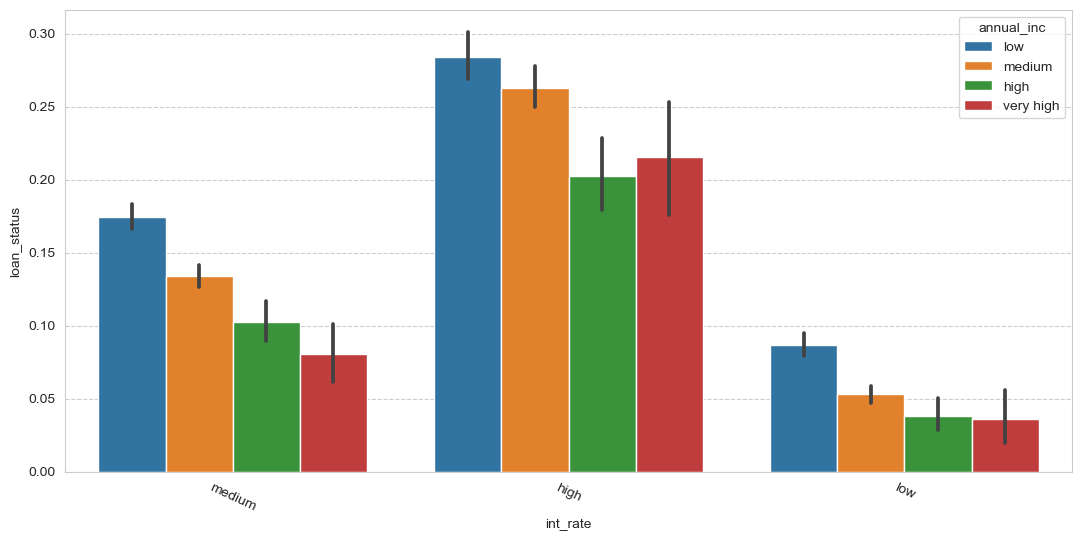

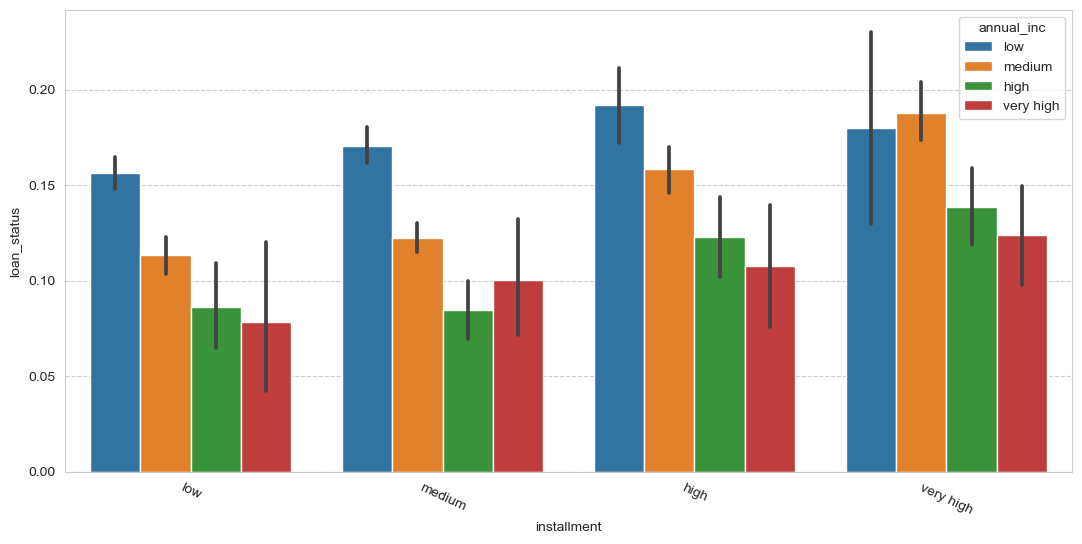

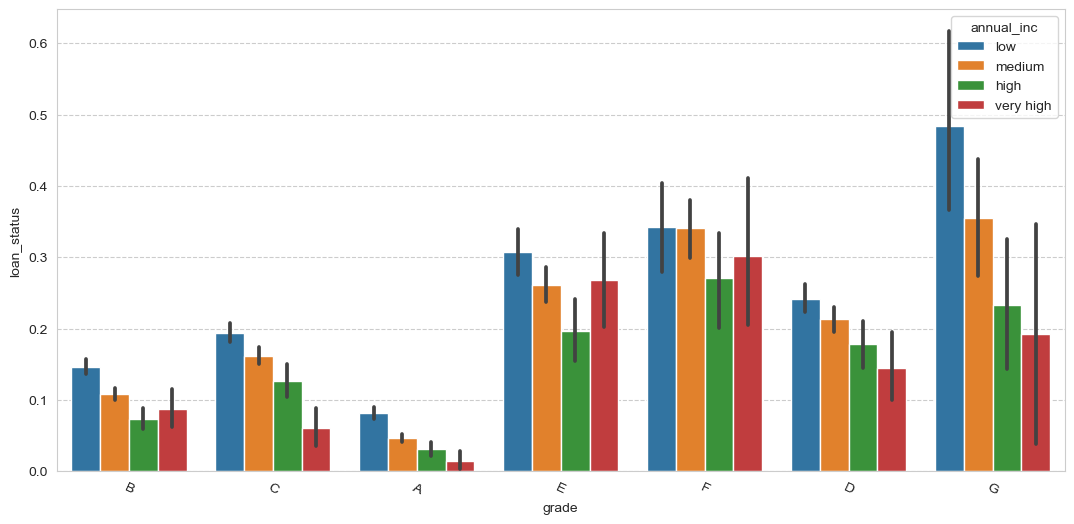

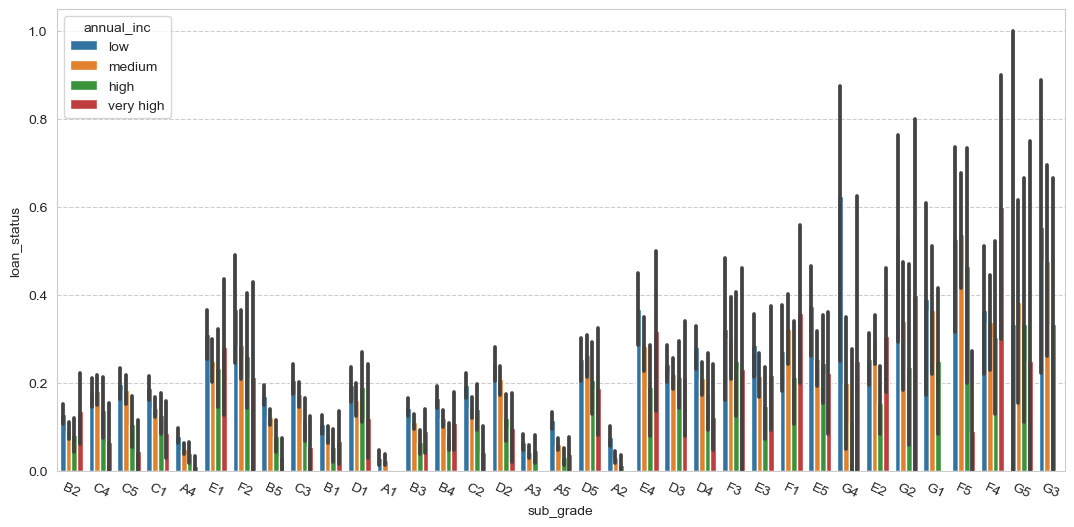

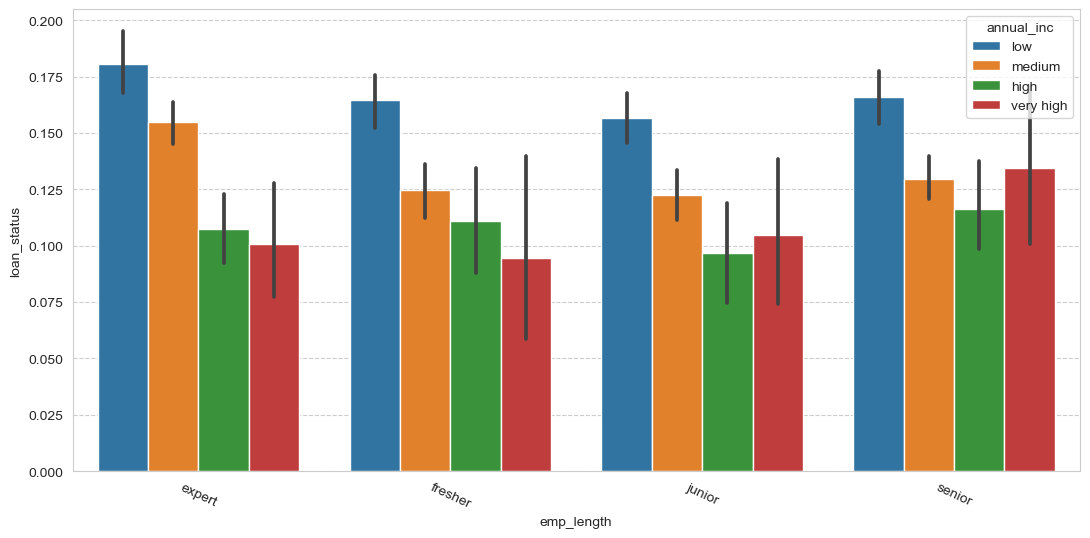

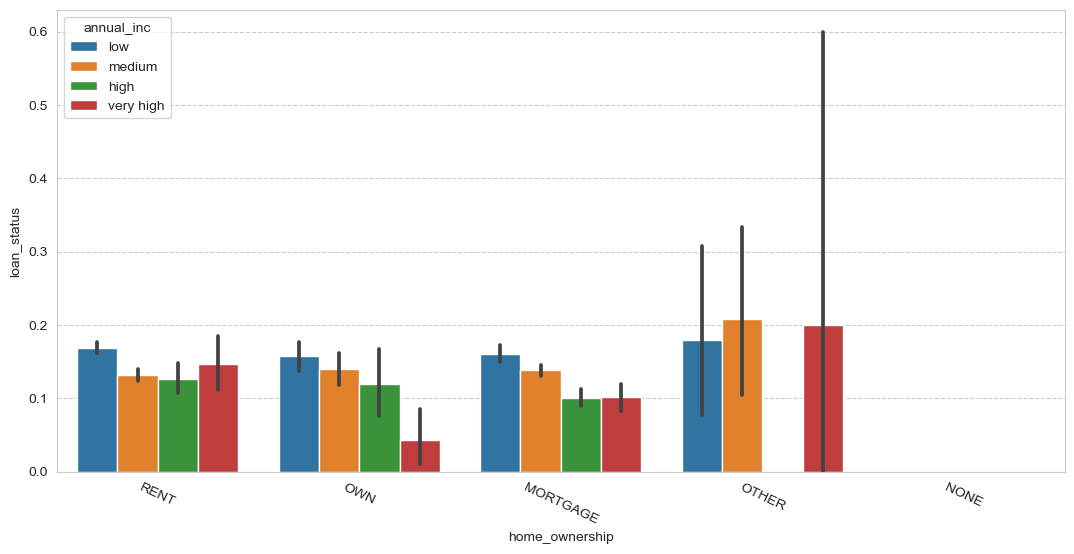

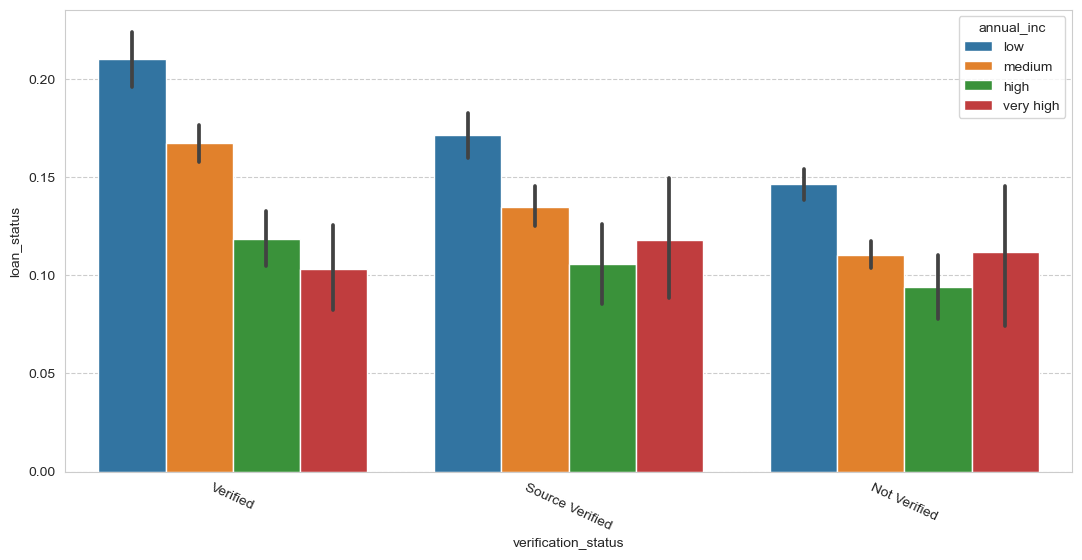

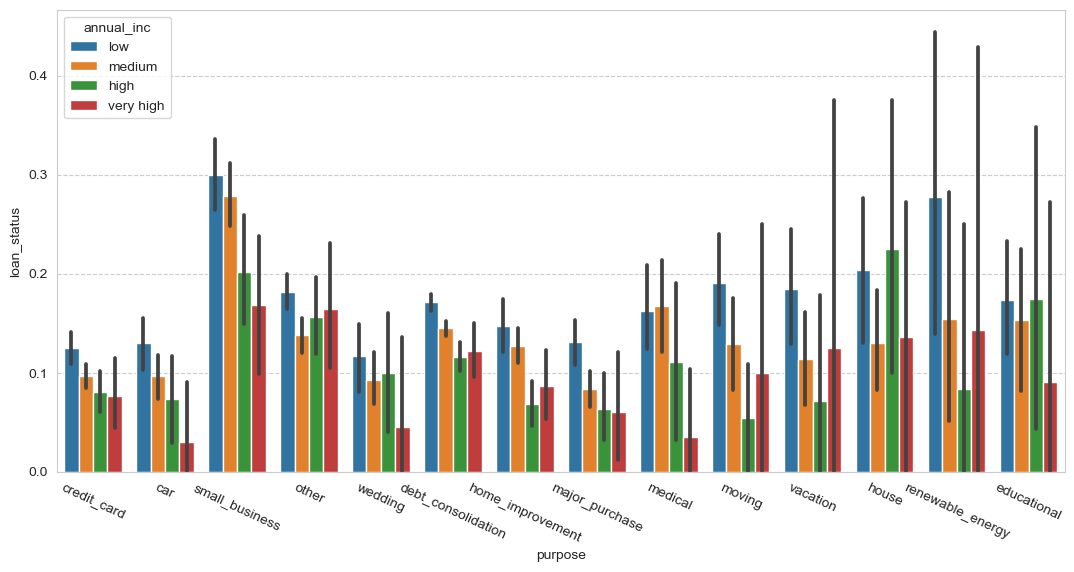

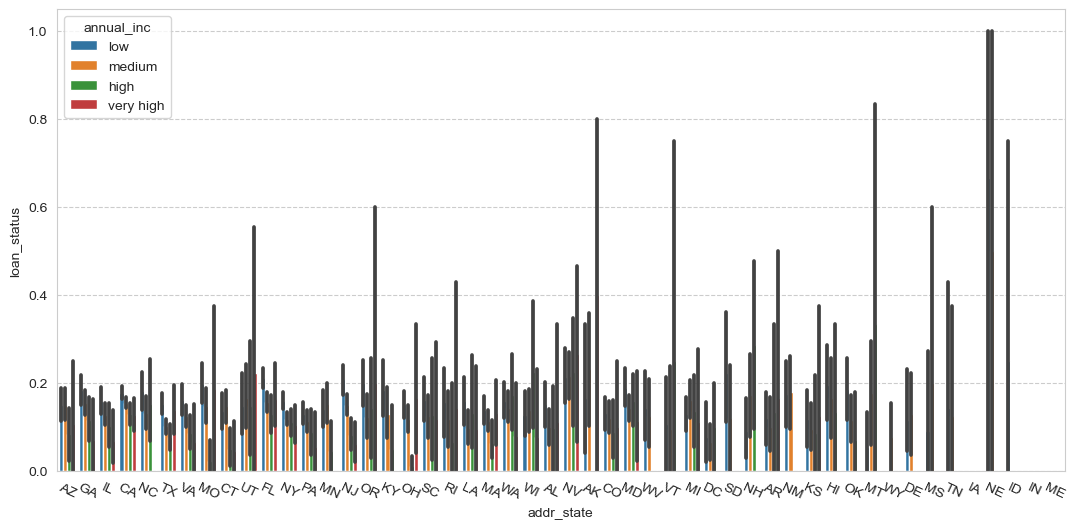

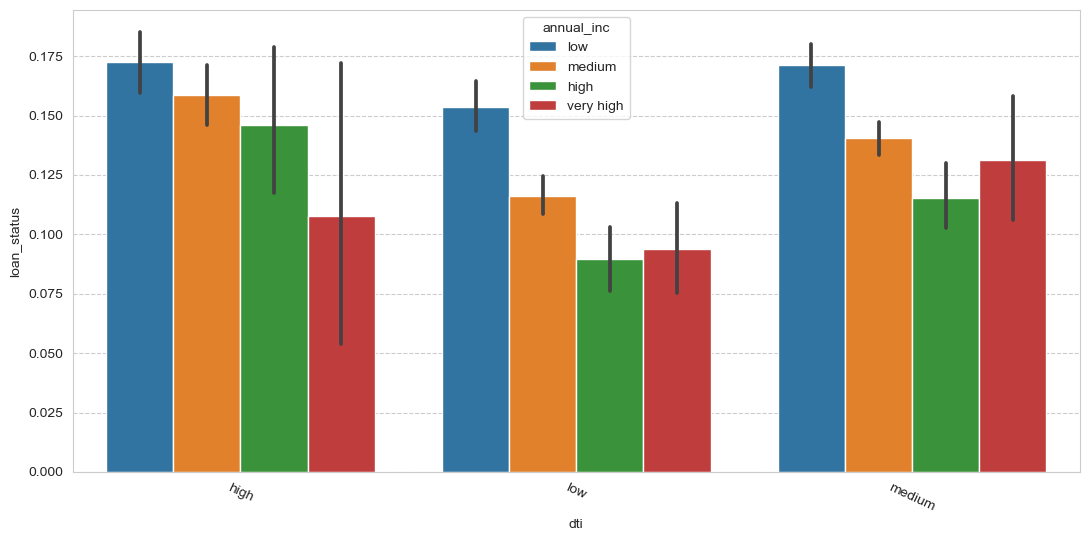

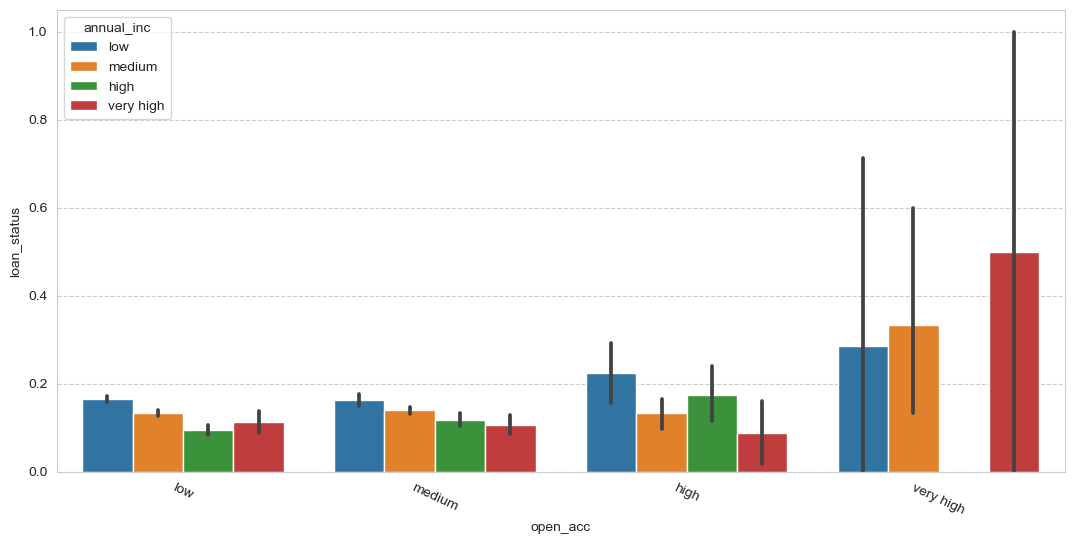

In [75]:
# Looking at each categorical data column with 'annual_inc' as hue

for column in categorical:
    if column != 'annual_inc':         
        plt.figure(figsize=(13, 6))
        sns.barplot(x=column, y='loan_status', hue='annual_inc', data=loan1)
        plt.xticks(rotation=-25)
        print('\n')
        plt.show()

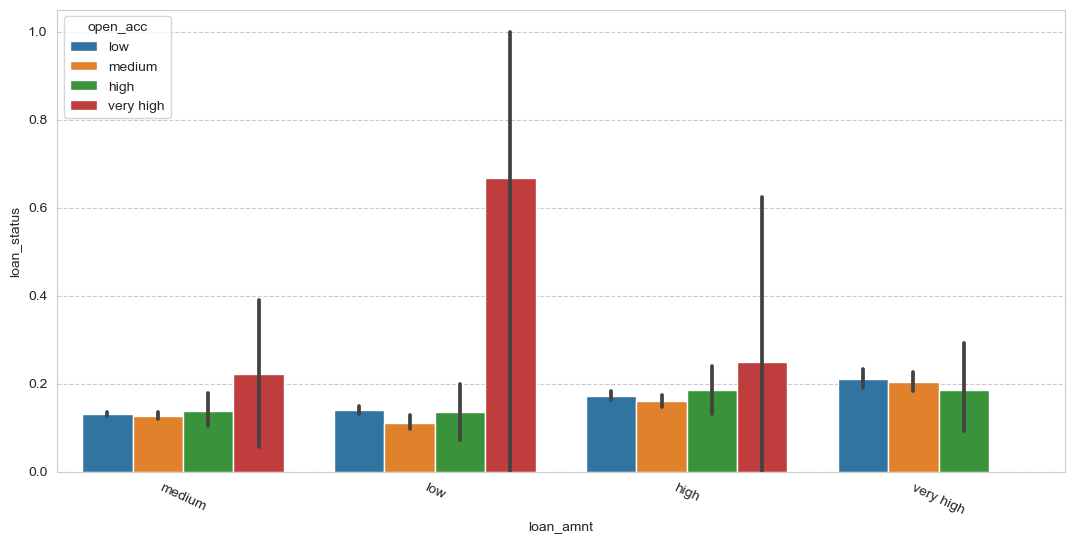

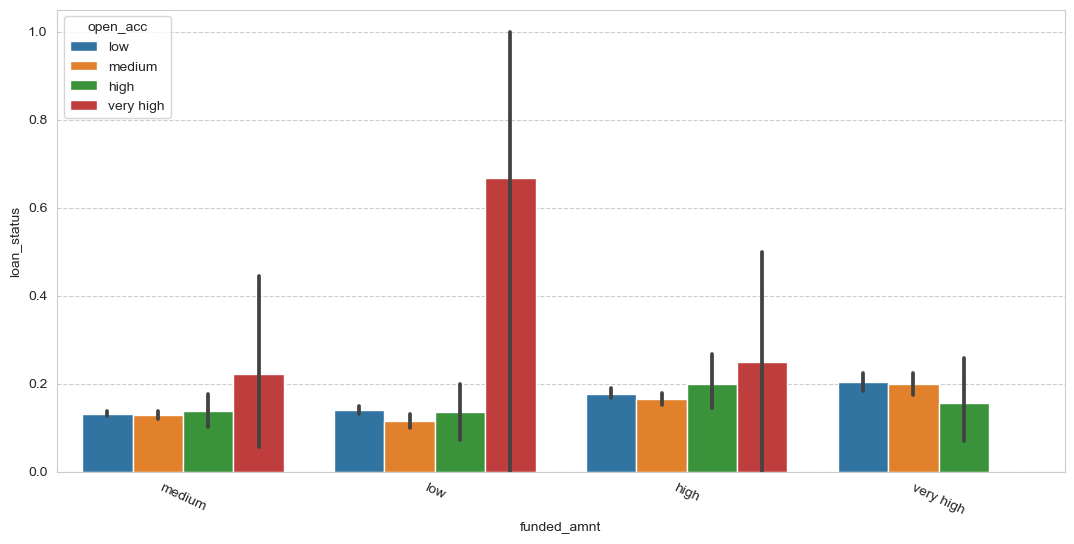

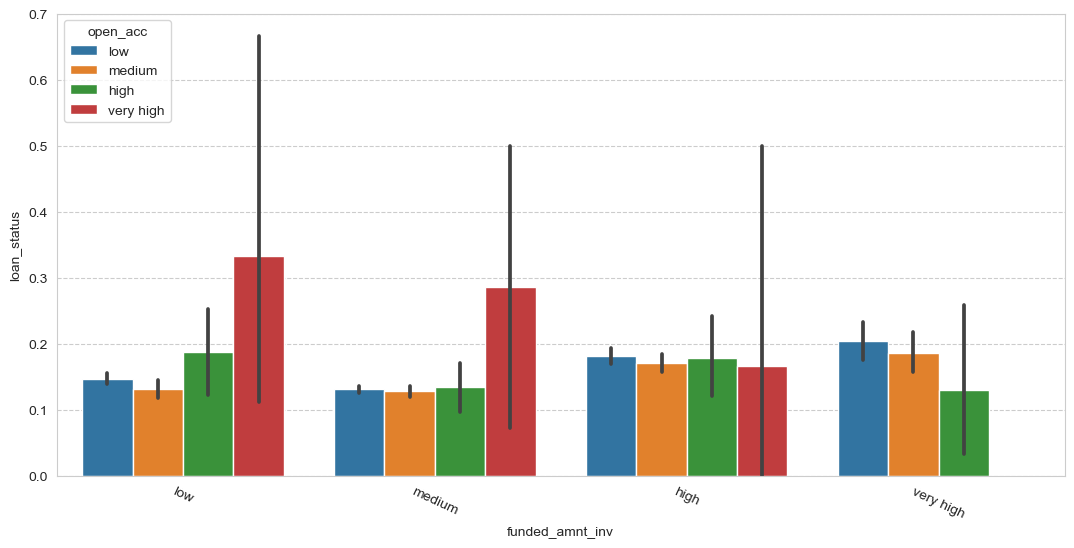

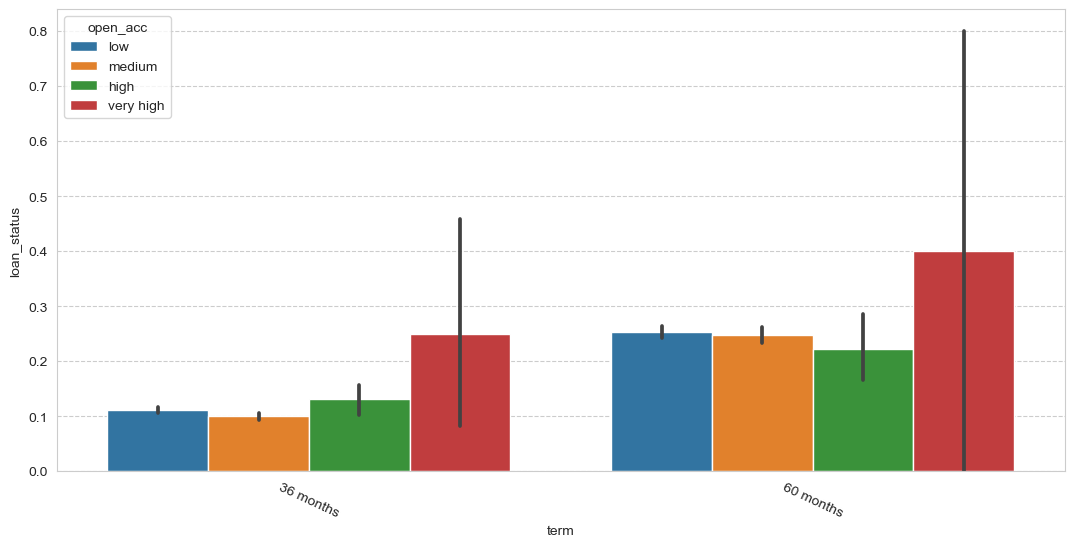

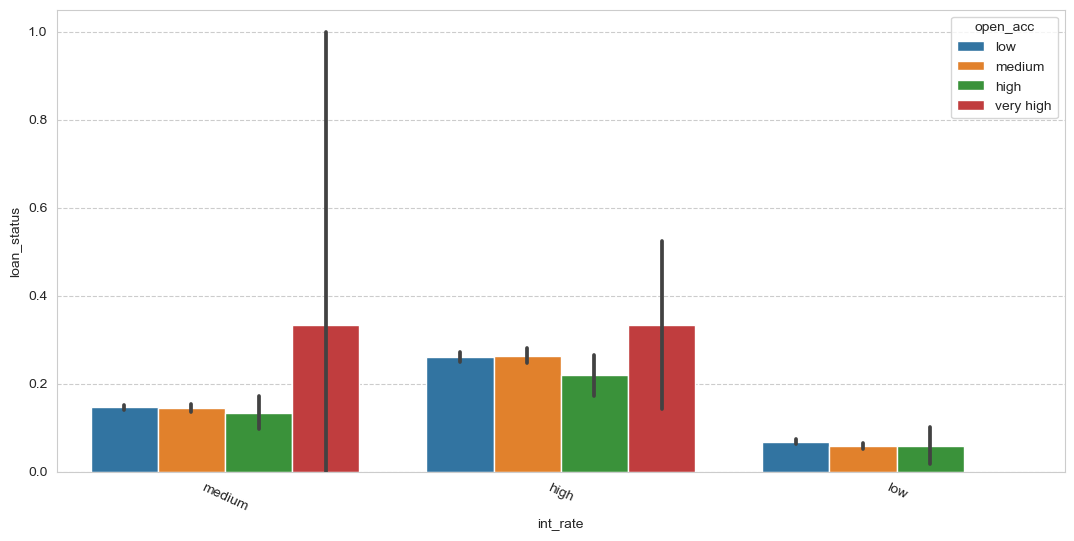

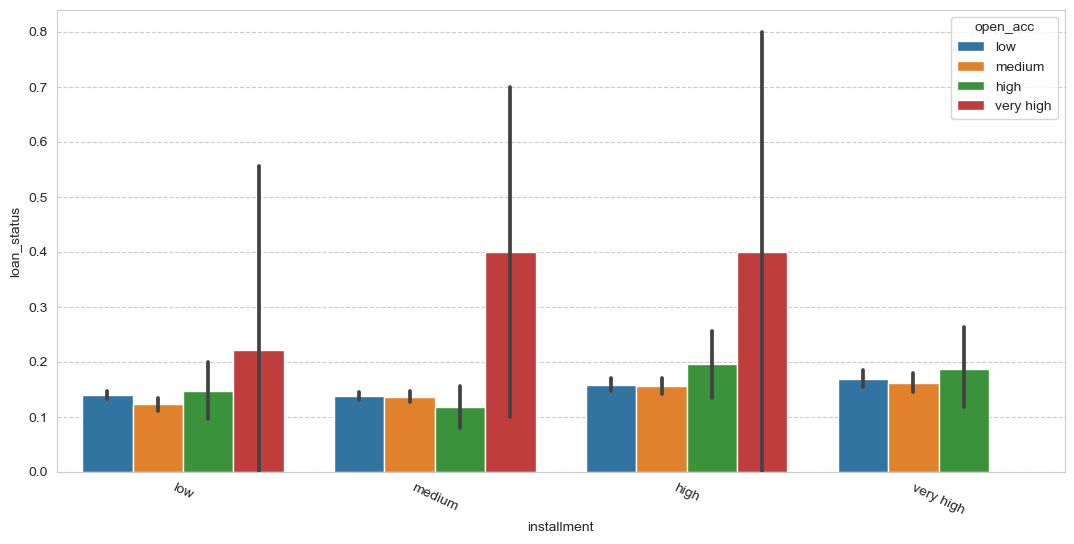

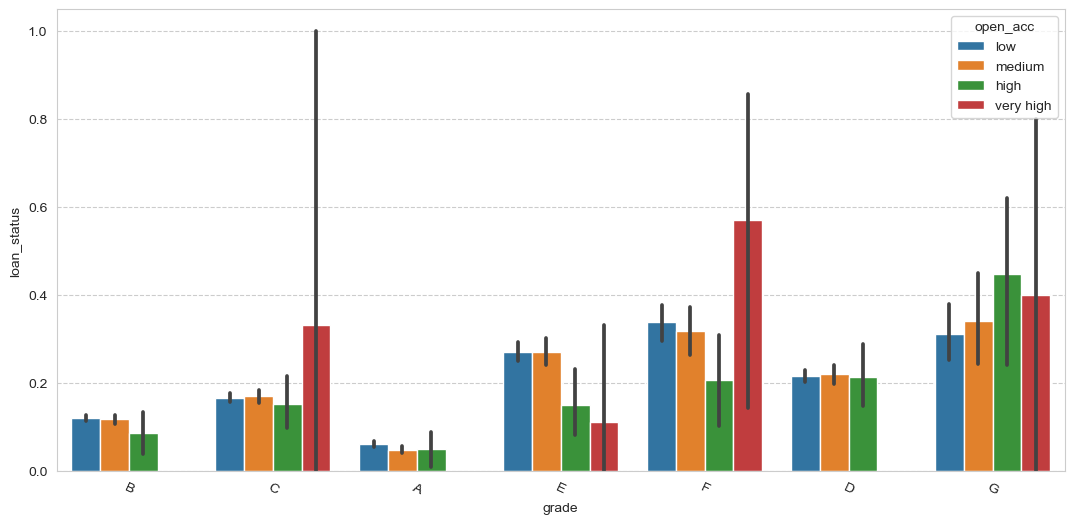

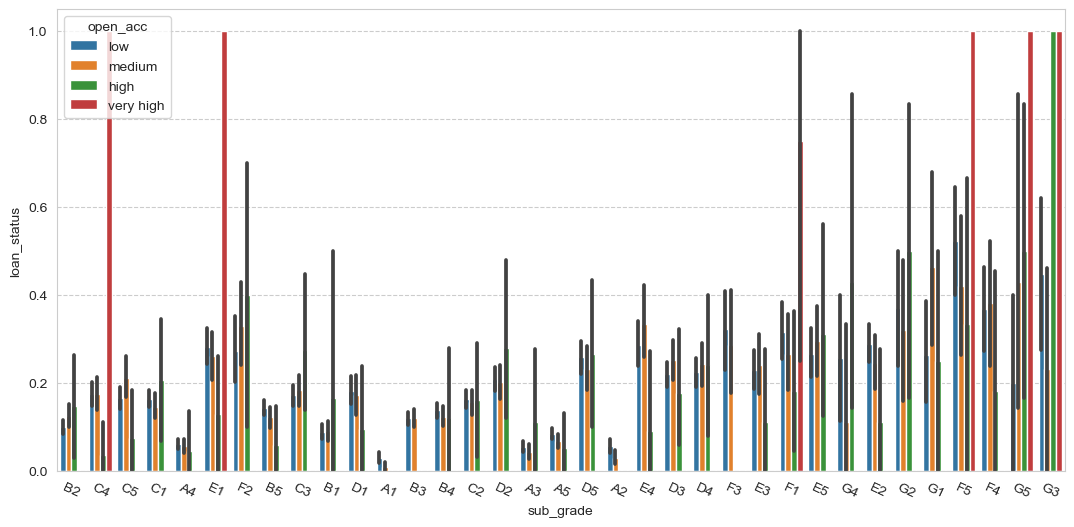

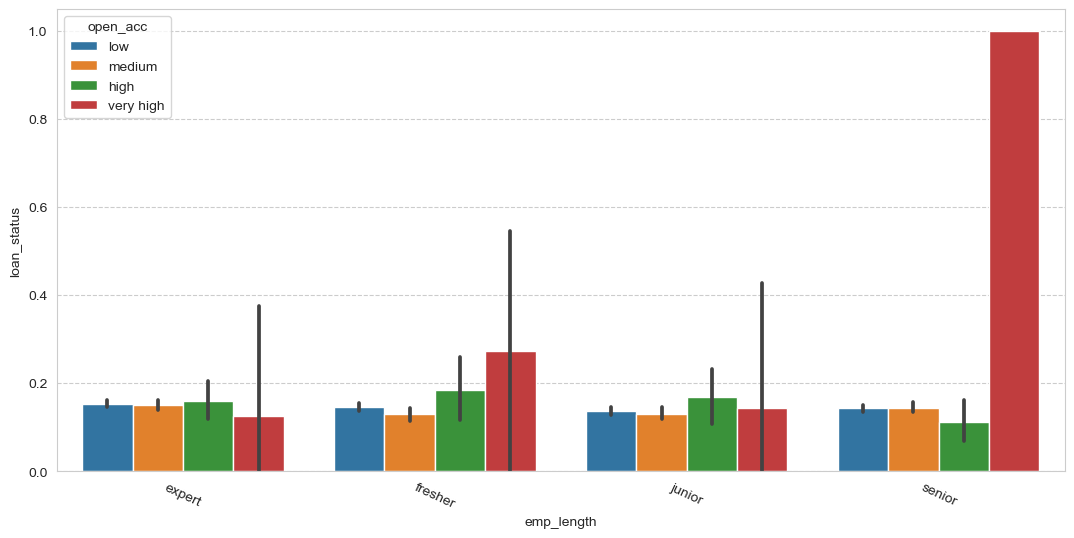

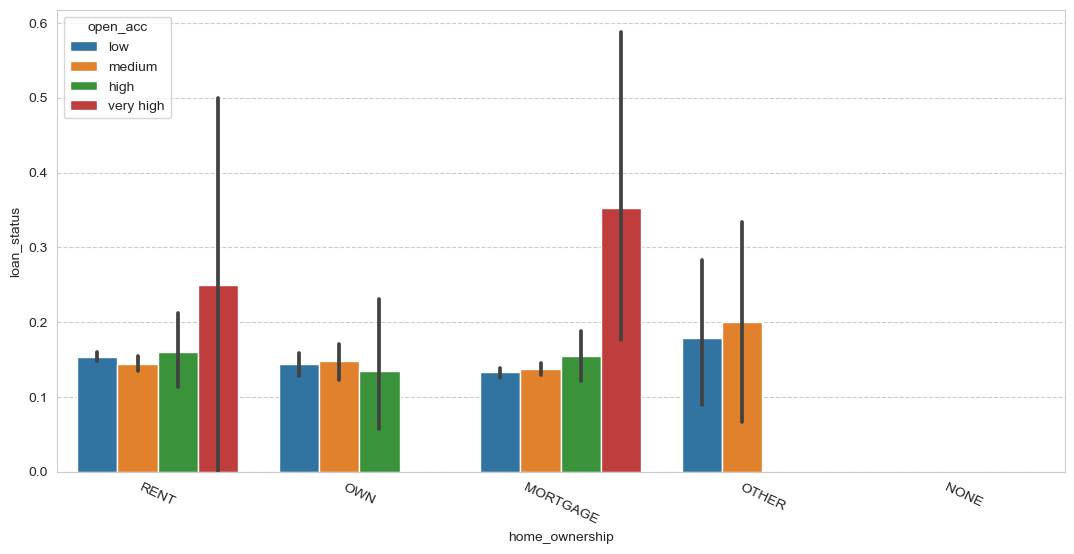

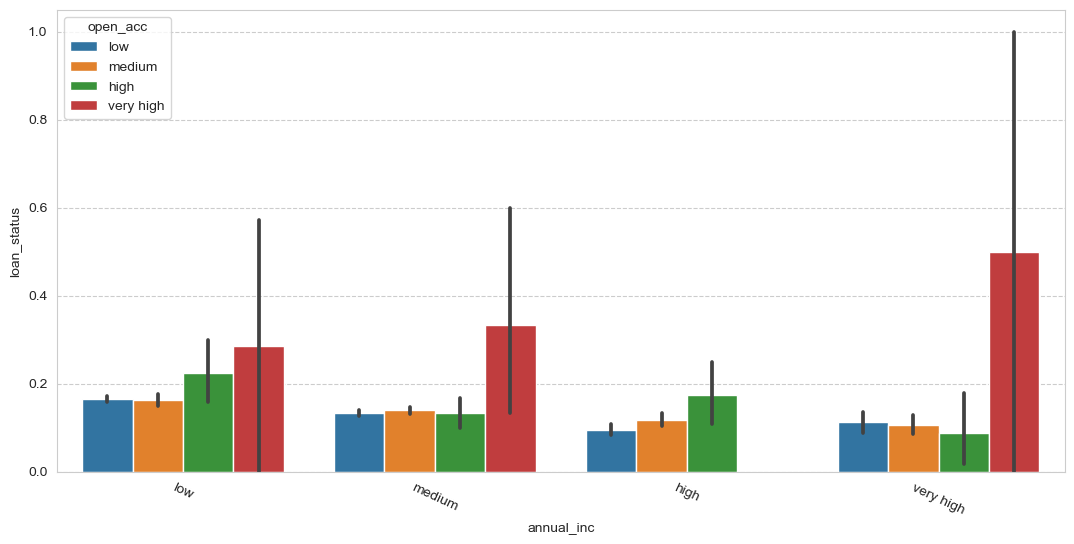

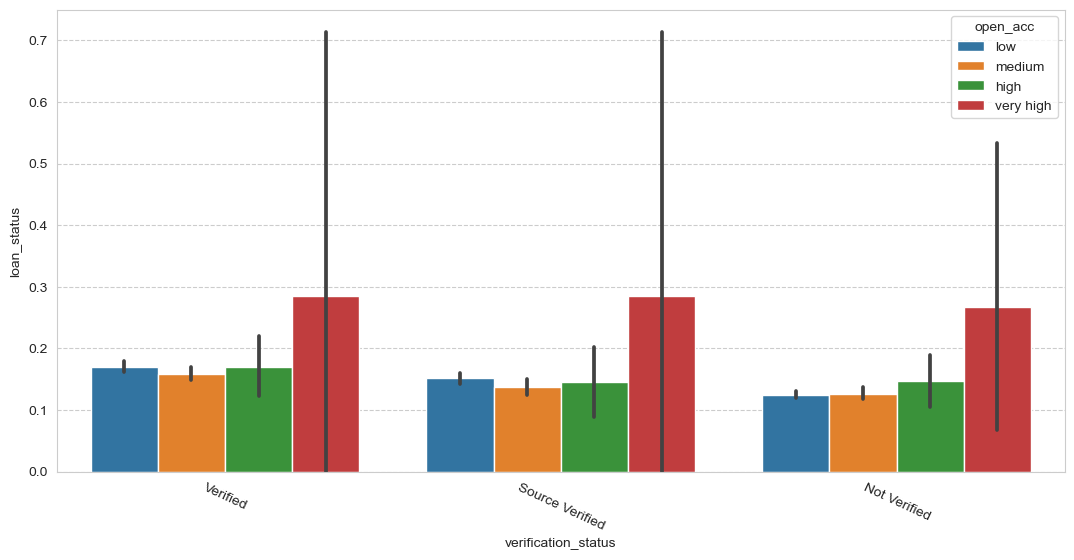

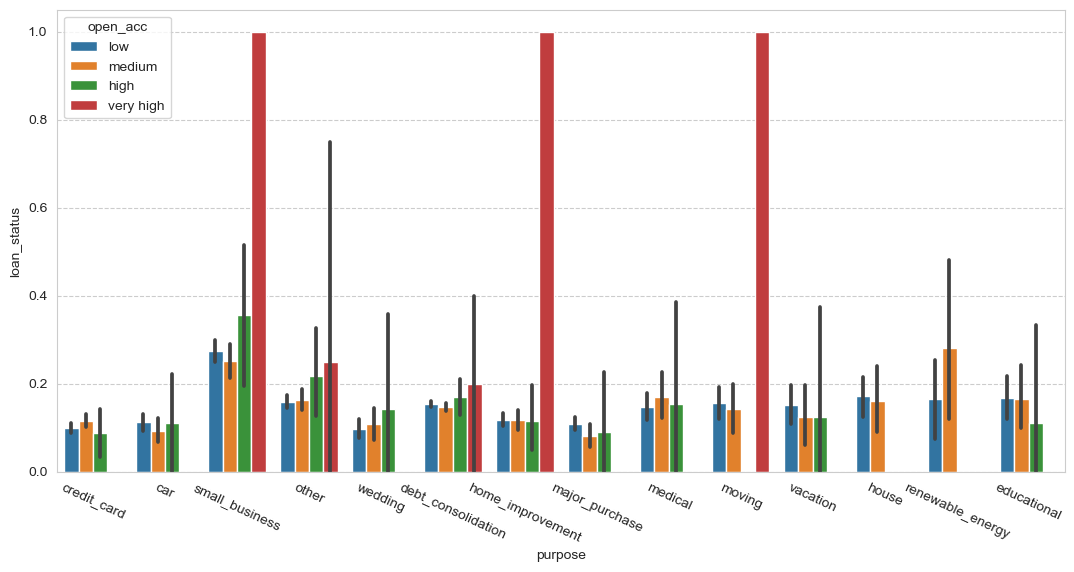

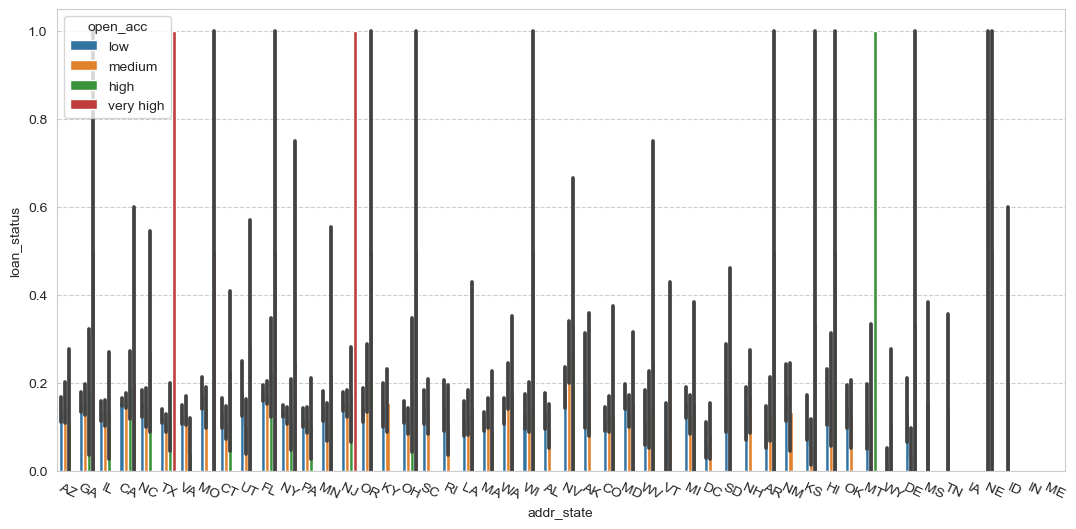

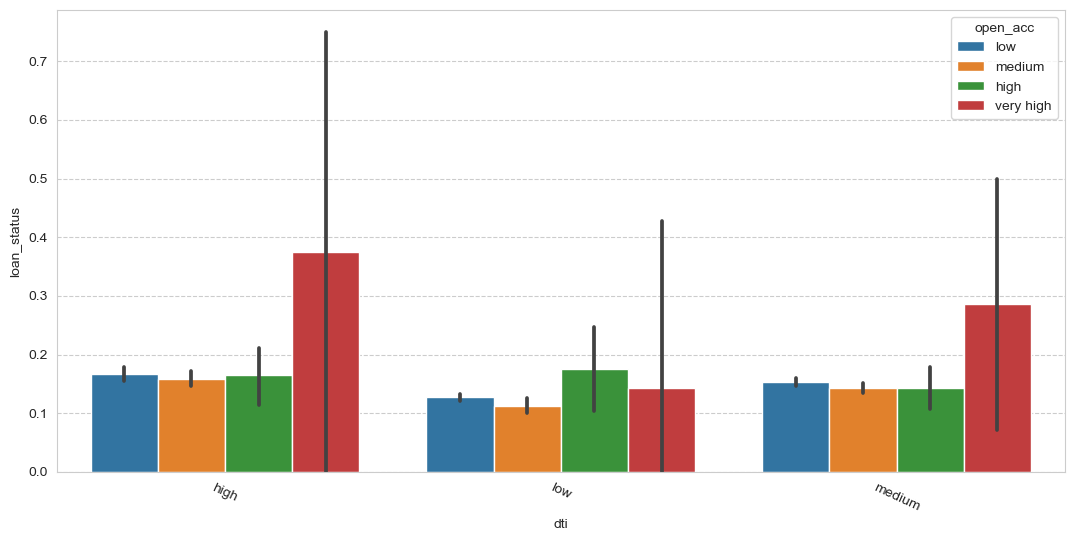

In [76]:
# Looking at each categorical data column with 'open_acc' as hue

for column in categorical:
    if column != 'open_acc':         
        plt.figure(figsize=(13, 6))
        sns.barplot(x=column, y='loan_status', hue='open_acc', data=loan1)
        plt.xticks(rotation=-25)
        print('\n')
        plt.show()

C:\Users\fv2\AppData\Local\Temp\ipykernel_26280\2525872041.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan1.corr(), annot=True)


<Axes: >

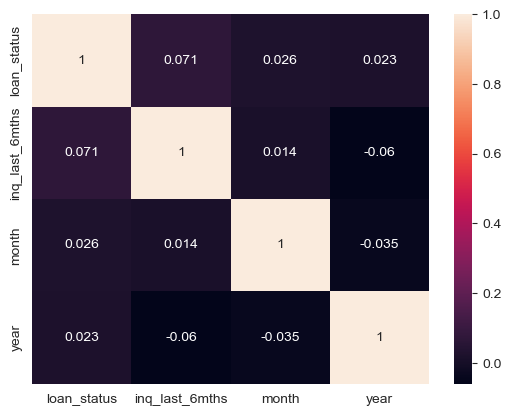

In [77]:
# Plotting a correlation map between all the numeric data columns

sns.heatmap(loan1.corr(), annot=True)